In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import feature_engine
import imblearn
from imblearn.over_sampling import SMOTE
# import packages

In [2]:
df=pd.read_csv('T:/Top Mentor/GitHub/Assignments/creditcard.csv')# load the file

In [3]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good


In [4]:
df.nunique()# unique of the datasets

NPA Status                                   2
RevolvingUtilizationOfUnsecuredLines    125731
age                                         86
Gender                                       2
Region                                       5
MonthlyIncome                            13594
Rented_OwnHouse                              2
Occupation                                   5
Education                                    5
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114193
MonthlyIncome.1                          13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          25
Good_Bad                                     2
dtype: int64

In [5]:
df.dtypes # data types 

NPA Status                              float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
Gender                                   object
Region                                   object
MonthlyIncome                           float64
Rented_OwnHouse                          object
Occupation                               object
Education                                object
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
MonthlyIncome.1                         float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                       object
Good_Bad                                 object
dtype: object

In [6]:
df.describe()# statistics descriptive summary

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,6.670221e+03,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387
std,0.249746,249.755371,14.771866,1.438467e+04,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,3.400000e+03,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,5.400000e+03,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559046,63.000000,8.249000e+03,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,109.000000,3.008750e+06,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


In [7]:
print(f'No of obesrvation and feature in dataset:{df.shape}')# 150002-rows and 17-columns

No of obesrvation and feature in dataset:(150002, 18)


# Datapreocessing

In [8]:
# split the data
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
# data given to algoobrithm and algorithm learn the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=12)

In [10]:
x_train.shape,x_test.shape

((135001, 17), (15001, 17))

# Training data for null values

In [1268]:
# combining the x_train and y_train 
Training_data=pd.concat([x_train,y_train],axis=1)

In [1269]:
Training_data.info()# Basic information about training data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135001 entries, 135928 to 40177
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            134999 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  134999 non-null  float64
 2   age                                   134999 non-null  float64
 3   Gender                                134999 non-null  object 
 4   Region                                134999 non-null  object 
 5   MonthlyIncome                         108235 non-null  float64
 6   Rented_OwnHouse                       134999 non-null  object 
 7   Occupation                            134999 non-null  object 
 8   Education                             134999 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  134999 non-null  float64
 10  DebtRatio                             134999 non-null  float64
 

In [1270]:
train_data=Training_data.copy()

In [1271]:
# checking the null values
Training_data.isna().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           26766
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         26766
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3541
Good_Bad                                    2
dtype: int64

In [1272]:
# most of the feature has 2 null values looks like duplicate lets check of the feature
Training_data[Training_data['Region']=='NaN']

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad


In [1273]:
Training_data[Training_data['Region'].isnull()].index

Int64Index([150001, 150000], dtype='int64')

In [1274]:
Training_data[Training_data['Gender']=='NaN']

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad


In [1275]:
# there is no value lets their index which observation has nan value
Training_data[Training_data['Gender'].isnull()].index

Int64Index([150001, 150000], dtype='int64')

In [1276]:
# observation has 150000, 150001 has null values lets check remaining features
Training_data[Training_data['Education'].isnull()].index

Int64Index([150001, 150000], dtype='int64')

In [1277]:
Training_data[Training_data['Good_Bad'].isnull()].index

Int64Index([150001, 150000], dtype='int64')

In [1278]:
# lets drop the [150000, 150001] observation
Training_data=Training_data.drop([150000, 150001],axis=0)

In [1279]:
Training_data.isna().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26764
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         26764
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3541
Good_Bad                                    0
dtype: int64

In [1280]:
# MonthlyIncome and MonthlyIncome.1  looks like same lets check their std()
Training_data['MonthlyIncome'].std()

14707.956849192302

In [1281]:
Training_data['MonthlyIncome.1'].std()

14707.956849192302

In [1282]:
# Both feature has same standarization()and lets drop one
Training_data=Training_data.drop(['MonthlyIncome'],axis=1)

In [1283]:
Training_data.isna().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         26764
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3541
Good_Bad                                    0
dtype: int64

In [1284]:
# taking only Numeric columns
numeric_feature=[feature for feature in Training_data.columns if Training_data[feature].dtype!='O' ]

In [1285]:
numeric_feature

['NPA Status',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome.1',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [1286]:
# NumberOfDependents values in continuous but dtypes in object
Training_data['NumberOfDependents']=pd.to_numeric(Training_data['NumberOfDependents'])

In [1287]:
# Replacing the Null values Training_data['MonthlyIncome']
# USING Mean,Median,Mode
mean_2=Training_data['MonthlyIncome.1'].mean()
median_2=Training_data['MonthlyIncome.1'].median()
mode_2=Training_data['MonthlyIncome.1'].mode()[0]

In [1288]:
def replace(Training_data,var,value,name):
    Training_data[var+name+'_replaced']=Training_data[var].fillna(value)

In [1289]:
replace(Training_data,'MonthlyIncome.1',mean_2,'mean')

In [1290]:
replace(Training_data,'MonthlyIncome.1',median_2,'median')

In [1291]:
replace(Training_data,'MonthlyIncome.1',mode_2,'mode')

In [1292]:
def plotting(dfs,var,var1,var2,var3,var4):
    fig=plt.figure(figsize=(8,5))
    ax=fig.add_subplot(1,1,1)
    dfs[var].plot(color='r',ax=ax,kind='kde',legend='var')
    dfs[var1].plot(color='b',ax=ax,kind='kde',legend='var1')
    dfs[var2].plot(color='y',ax=ax,kind='kde',legend='var2')
    dfs[var3].plot(color='m',ax=ax,kind='kde',legend='var3')
    dfs[var4].plot(color='g',ax=ax,kind='kde',legend='var4')
    plt.show() 

In [1293]:
# Random Sample Imputation
Training_data['MonthlyIncome_random']=Training_data['MonthlyIncome.1'].copy()
s=Training_data['MonthlyIncome.1'].dropna().sample(Training_data['MonthlyIncome.1'].isnull().sum(),random_state=11)
s.index=Training_data[Training_data['MonthlyIncome.1'].isnull()].index
Training_data.loc[Training_data['MonthlyIncome.1'].isnull(),'MonthlyIncome_random']=s

In [1294]:
Training_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad', 'MonthlyIncome.1mean_replaced',
       'MonthlyIncome.1median_replaced', 'MonthlyIncome.1mode_replaced',
       'MonthlyIncome_random'],
      dtype='object')

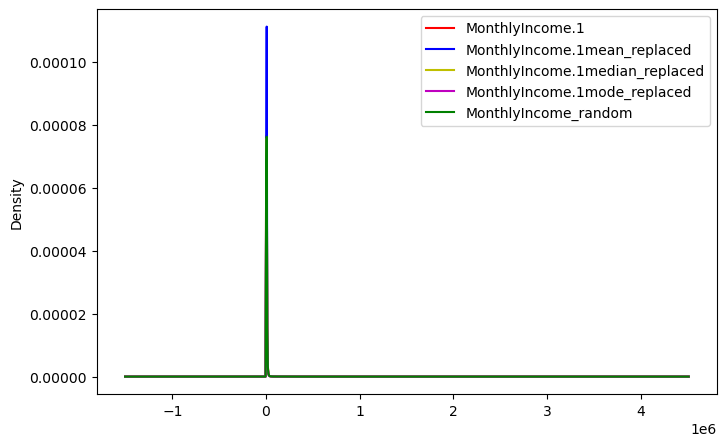

In [1295]:
plotting(Training_data,'MonthlyIncome.1','MonthlyIncome.1mean_replaced','MonthlyIncome.1median_replaced','MonthlyIncome.1mode_replaced','MonthlyIncome_random')

In [1296]:
print('std for monthly random incom:',Training_data['MonthlyIncome.1'].std())
print('std for monthly random incom:',Training_data['MonthlyIncome.1mean_replaced'].std())
print('std for monthly random incom:',Training_data['MonthlyIncome.1median_replaced'].std())
print('std for monthly random incom:',Training_data['MonthlyIncome.1mode_replaced'].std())
print('std for monthly random incom:',Training_data['MonthlyIncome_random'].std())

std for monthly random incom: 14707.956849192302
std for monthly random incom: 13169.537834181054
std for monthly random incom: 13179.243193345163
std for monthly random incom: 13186.32522021578
std for monthly random incom: 13622.126152211735


In [1297]:
Training_data=Training_data.drop(['MonthlyIncome.1','MonthlyIncome.1mean_replaced','MonthlyIncome.1median_replaced','MonthlyIncome.1mode_replaced'],axis=1)

In [1298]:
Training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_random
135928,0.0,0.224926,54.0,Male,West,Rented,Non-officer,Professional,0.0,0.121769,14.0,0.0,0.0,0.0,0.0,Good,7078.0
95567,0.0,0.655320,56.0,Female,Central,Rented,Non-officer,Graduate,0.0,0.210929,7.0,0.0,0.0,0.0,1.0,Good,5617.0
80798,0.0,1.000000,27.0,Female,Central,Rented,Officer2,Professional,0.0,326.000000,1.0,0.0,0.0,0.0,NaN,Good,4500.0
98512,0.0,0.543760,42.0,Male,Central,Ownhouse,Non-officer,Graduate,0.0,1965.000000,11.0,0.0,1.0,0.0,3.0,Good,7200.0
66964,0.0,0.054019,48.0,Male,Central,Ownhouse,Officer2,Professional,0.0,0.233234,7.0,0.0,1.0,0.0,0.0,Good,8051.0


Random both looks close to the point .lets take Mode to fill null value

In [1299]:
mean_1=Training_data['NumberOfDependents'].mean()
median_1=Training_data['NumberOfDependents'].median()
mode_1=Training_data['NumberOfDependents'].mode()[0]

In [1300]:
print(mean_1)
print(median_1)
print(mode_1)

0.7559068295577295
0.0
0.0


In [1301]:
replace(Training_data,'NumberOfDependents',mean_1,'mean')

In [1302]:
replace(Training_data,'NumberOfDependents',median_1,'median')

In [1303]:
replace(Training_data,'NumberOfDependents',mode_1,'mode')

In [1304]:
Training_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad', 'MonthlyIncome_random',
       'NumberOfDependentsmean_replaced', 'NumberOfDependentsmedian_replaced',
       'NumberOfDependentsmode_replaced'],
      dtype='object')

In [1305]:
def plotting(dfs,var,var1,var2,var3):
    fig=plt.figure(figsize=(8,5))
    ax=fig.add_subplot(1,1,1)
    dfs[var].plot(color='r',ax=ax,kind='kde',legend='var')
    dfs[var1].plot(color='b',ax=ax,kind='kde',legend='var1')
    dfs[var2].plot(color='y',ax=ax,kind='kde',legend='var2')
    dfs[var3].plot(color='m',ax=ax,kind='kde',legend='var3')
    plt.show() 

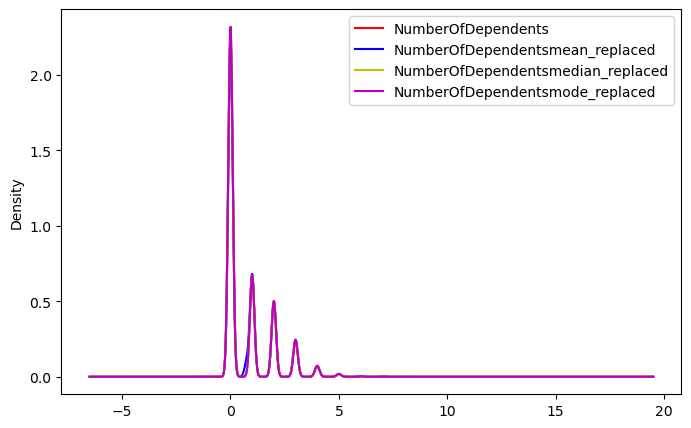

In [1306]:
plotting(Training_data,'NumberOfDependents','NumberOfDependentsmean_replaced','NumberOfDependentsmedian_replaced','NumberOfDependentsmode_replaced')

In [1307]:
print('std for NumberOfDependents:',Training_data['NumberOfDependents'].std())
print('std for NumberOfDependentsmean:',Training_data['NumberOfDependentsmean_replaced'].std())
print('std for NumberOfDependentsmedian:',Training_data['NumberOfDependentsmedian_replaced'].std())
print('std for NumberOfDependentsmode:',Training_data['NumberOfDependentsmode_replaced'].std())

std for NumberOfDependents: 1.1135558043886484
std for NumberOfDependentsmean: 1.0988544651696057
std for NumberOfDependentsmedian: 1.1054753346715165
std for NumberOfDependentsmode: 1.1054753346715165


Mean and Median close to the value ...

In [1308]:
Training_data=Training_data.drop(['NumberOfDependents','NumberOfDependentsmedian_replaced','NumberOfDependentsmode_replaced'],axis=1)

In [1309]:
Training_data.isna().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_random                    0
NumberOfDependentsmean_replaced         0
dtype: int64

# Testing data

In [1310]:
# combine the x_test and y_test
Testing_data=pd.concat([x_test,y_test],axis=1)

In [1311]:
Testing_data.isnull().sum()# checking the null values 

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           2967
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome.1                         2967
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       383
Good_Bad                                   0
dtype: int64

In [1312]:
Testing_data=Testing_data.drop(['MonthlyIncome'],axis=1)

In [1313]:
Testing_data["MonthlyIncome_random"] = Testing_data["MonthlyIncome.1"].copy()
s= Training_data["MonthlyIncome_random"].dropna().sample(Testing_data["MonthlyIncome.1"].isnull().sum(), random_state=12)
s.index = Testing_data[Testing_data["MonthlyIncome.1"].isnull()].index
Testing_data.loc[Testing_data["MonthlyIncome.1"].isnull(),"MonthlyIncome_random"] = s

In [1314]:
# replace the same training data value to testing data
Testing_data['NumberOfDependents']=pd.to_numeric(Testing_data['NumberOfDependents'])

In [1315]:
Testing_data['NumberOfDependents']=Testing_data['NumberOfDependents'].fillna(mean_1)

In [1316]:
Testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome.1                         2967
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                         0
Good_Bad                                   0
MonthlyIncome_random                       0
dtype: int64

In [1317]:
Testing_data.dtypes

NPA Status                              float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
Gender                                   object
Region                                   object
Rented_OwnHouse                          object
Occupation                               object
Education                                object
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
MonthlyIncome.1                         float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                      float64
Good_Bad                                 object
MonthlyIncome_random                    float64
dtype: object

In [1318]:
Testing_data=Testing_data.drop(['MonthlyIncome.1'],axis=1)

 NULL VALUES HAS BEEN REPLACED AND LETS DO EDA[explortary data analysis]

# EDA

In [1319]:
# Univarte Analysis
numeric=Training_data.select_dtypes(exclude='object')

In [1320]:
numeric.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_random', 'NumberOfDependentsmean_replaced'],
      dtype='object')

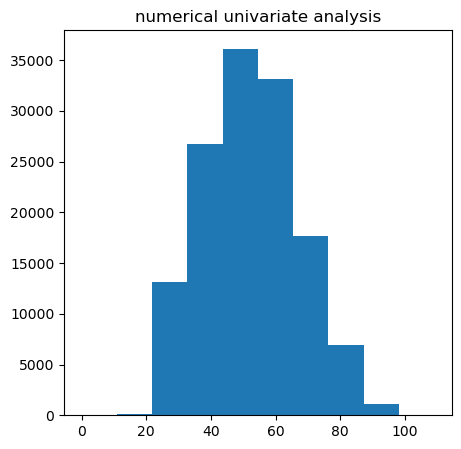

In [1321]:
# Univarte Analysis
# around 30 to 60 having a lot of transcation in card
plt.figure(figsize=(5, 5))
plt.hist(Training_data['age'],bins=10)
plt.title("numerical univariate analysis")
plt.show()

In [1322]:
Training_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [1323]:
 # univariate analysis categorical column
fur_name=Training_data['Gender'].value_counts().index
fur_val=Training_data['Gender'].value_counts().values
fur_val

array([83166, 51833], dtype=int64)

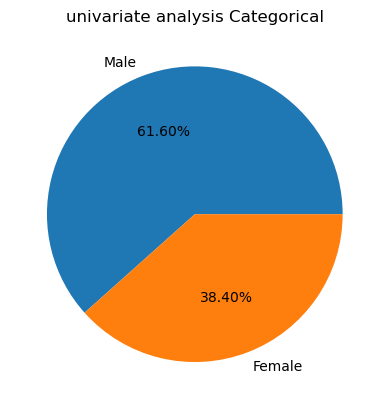

In [1324]:
# Male has borrowed 61.58% for card transcation
plt.pie(fur_val,labels=fur_name,autopct='%1.2f%%')
plt.title("univariate analysis Categorical")
plt.show()


In [1325]:
# Bivarte Analysis

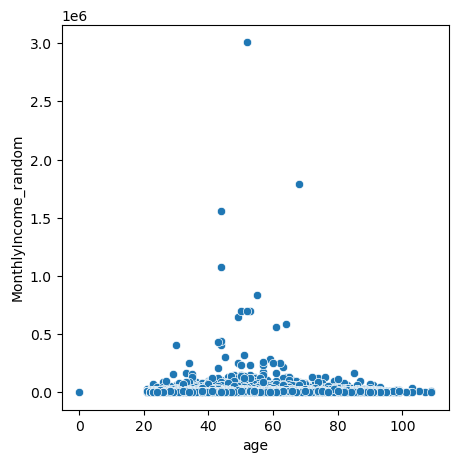

In [1326]:
plt.figure(figsize=(5,5))#AGE OF BORROWERS IN YEARS and their montly income
sns.scatterplot(x=Training_data['age'],y=Training_data['MonthlyIncome_random'])
plt.show()

In [1327]:
categorical_feature=[feature for feature in Training_data.columns if Training_data[feature].dtypes=='O']

In [1328]:
categorical_feature

['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education', 'Good_Bad']

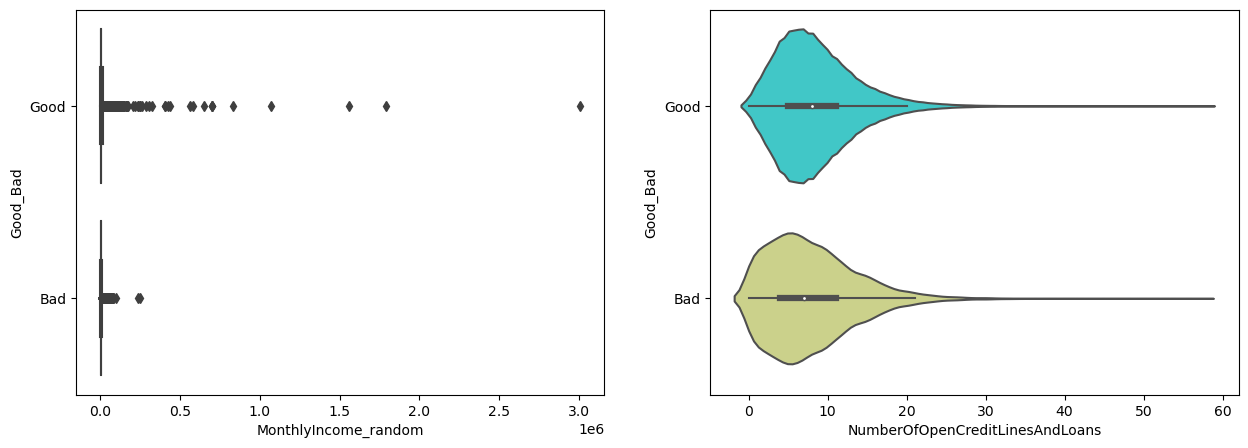

In [1329]:
# checking the relationship between monthly income,NumberOfOpenCreditLinesAndLoans with dependent variable Good_Bad
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='MonthlyIncome_random',y='Good_Bad',data=Training_data)
plt.subplot(1,2,2)
sns.violinplot(x='NumberOfOpenCreditLinesAndLoans',y='Good_Bad',data=Training_data,palette='rainbow')
plt.show()

In [1330]:
# Lets check the normal distribution for Training data[Continuous variable]
Training_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'MonthlyIncome_random', 'NumberOfDependentsmean_replaced'],
      dtype='object')

In [1331]:
# numeric columns
Training_data_numeric=Training_data.select_dtypes(exclude='object')
Training_data_numeric.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_random', 'NumberOfDependentsmean_replaced'],
      dtype='object')

In [1332]:
# categorical columns
Train_cat_cols=Training_data.select_dtypes(include='object')
Train_cat_cols.columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Good_Bad'],
      dtype='object')

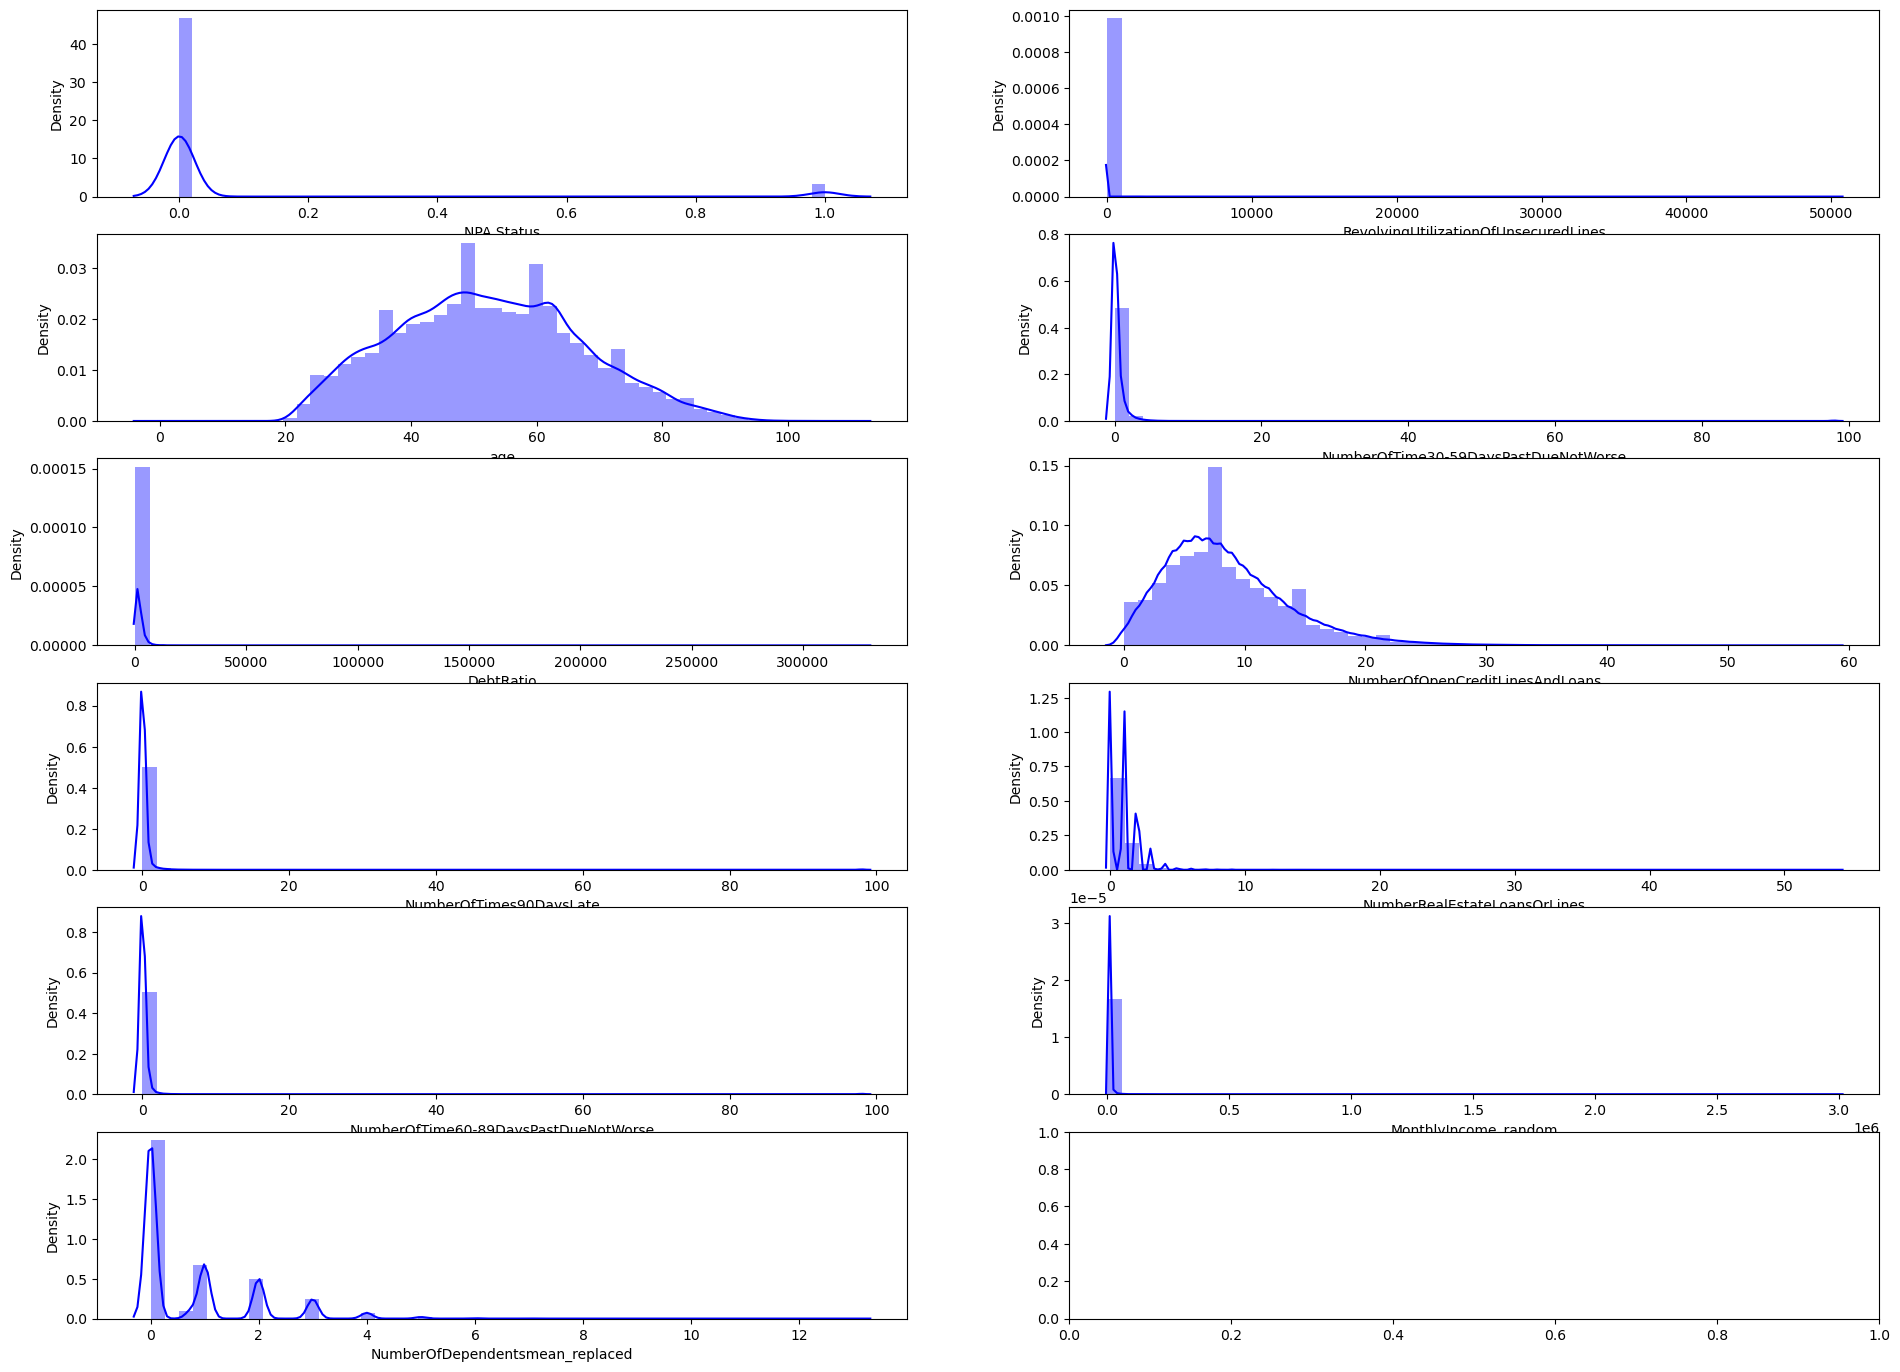

In [1333]:
#plot the normal distribution
fig,ax=plt.subplots(6,2,figsize=(23,17))
for i,subplot in zip(Training_data_numeric.columns,ax.flatten()):
    sns.distplot(Training_data[i],color='b',ax=subplot)

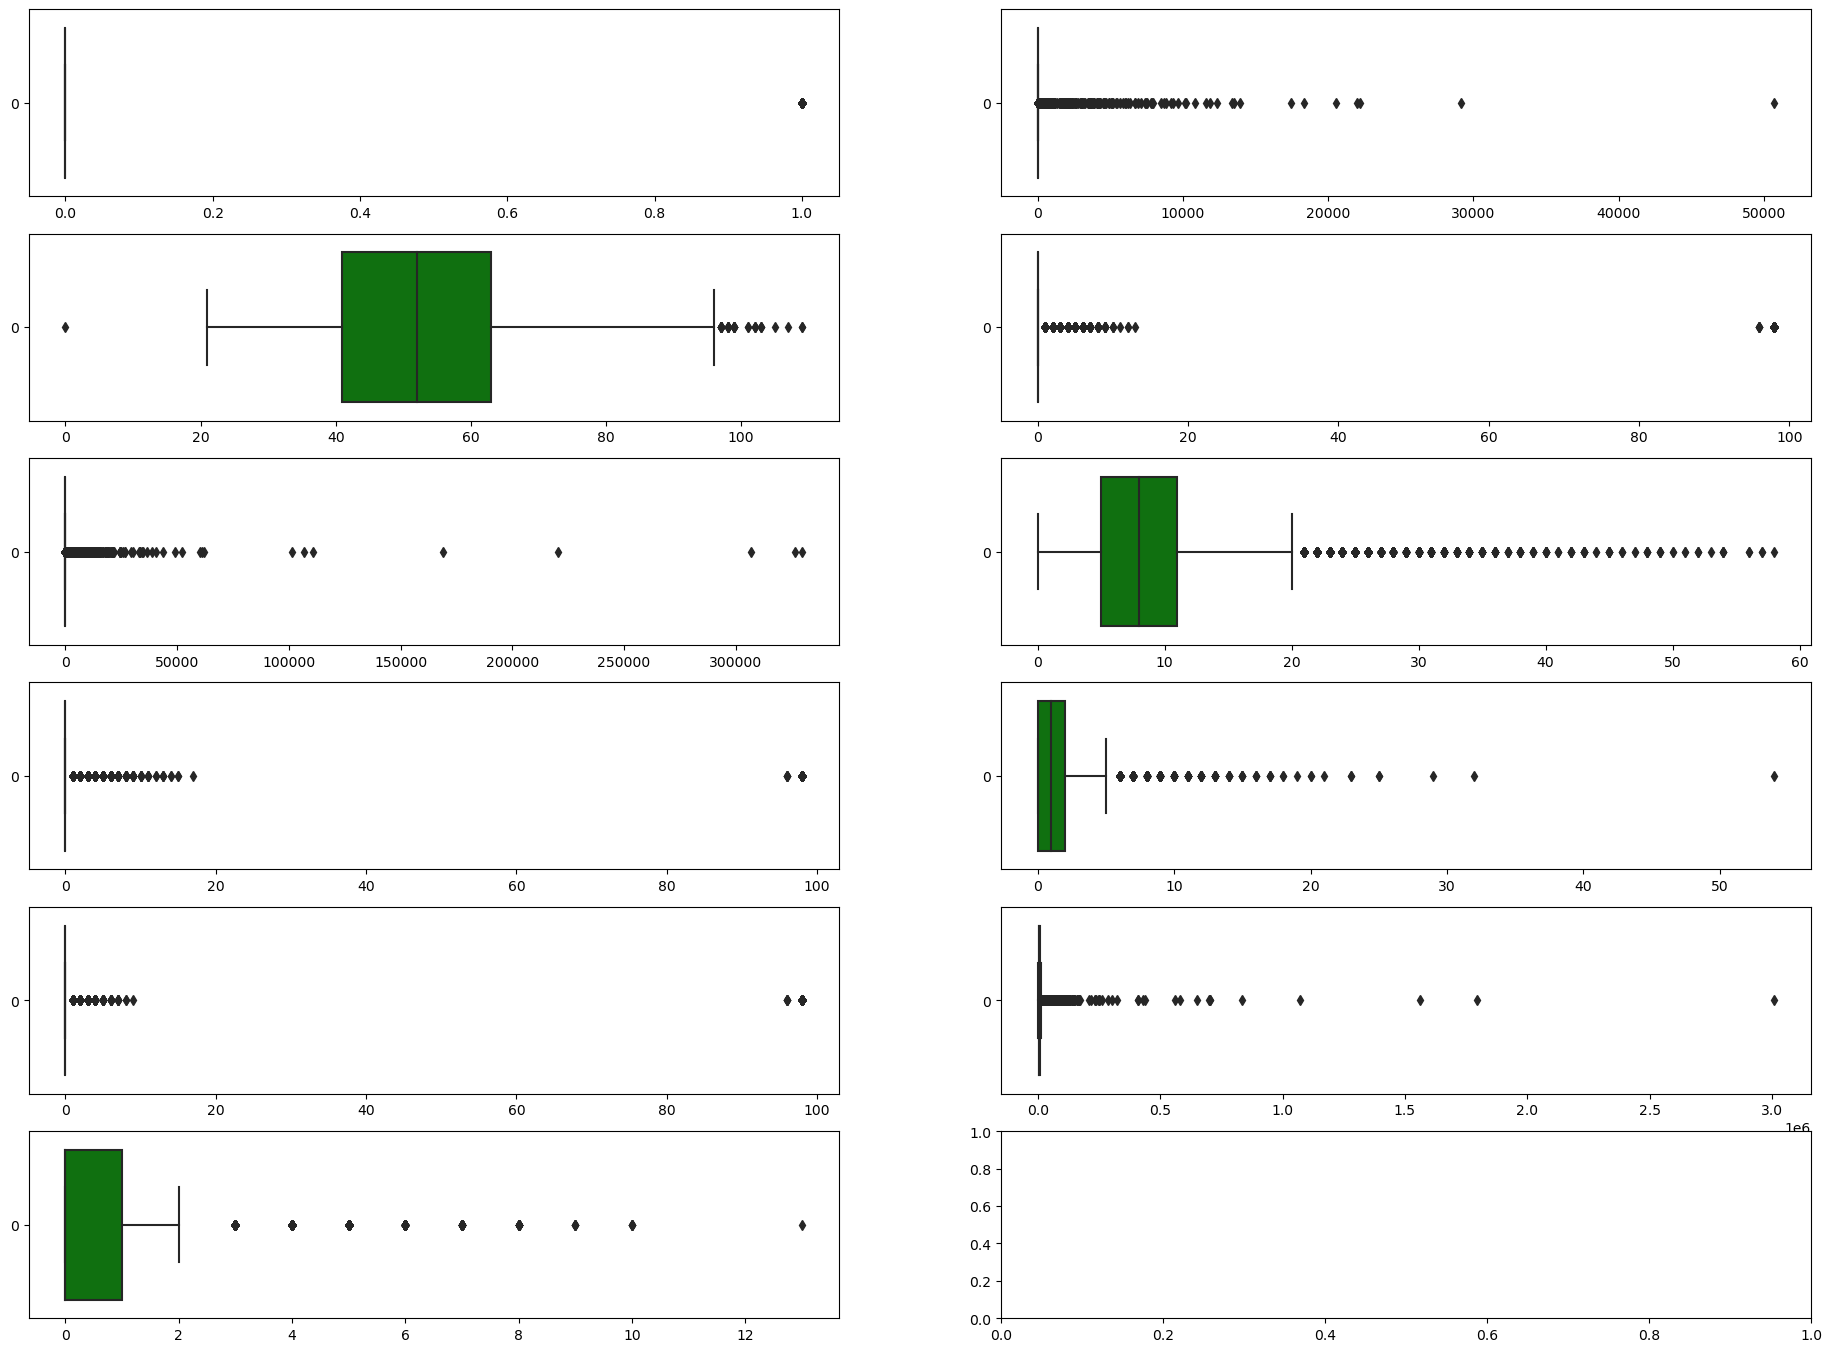

In [1334]:
#kde doesn't looks good let do in boxplot 
fig,ax=plt.subplots(6,2,figsize=(23,17))
for i,subplot in zip(Training_data_numeric.columns,ax.flatten()):
    sns.boxplot(Training_data_numeric[i],orient='h',color='g',ax=subplot)


In [1335]:
Training_data_numeric.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_random,NumberOfDependentsmean_replaced
135928,0.0,0.224926,54.0,0.0,0.121769,14.0,0.0,0.0,0.0,7078.0,0.000000
95567,0.0,0.655320,56.0,0.0,0.210929,7.0,0.0,0.0,0.0,5617.0,1.000000
80798,0.0,1.000000,27.0,0.0,326.000000,1.0,0.0,0.0,0.0,4500.0,0.755907
98512,0.0,0.543760,42.0,0.0,1965.000000,11.0,0.0,1.0,0.0,7200.0,3.000000
66964,0.0,0.054019,48.0,0.0,0.233234,7.0,0.0,1.0,0.0,8051.0,0.000000


# Variable Transformation

BOTH normal distribution and boxplot of training data doesn't look good lets check with variable transformation Technique

In [1336]:
def fun(dfs,var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.title("hist")
    dfs[var].hist(bins=8,grid=False)
    plt.subplot(1,3,2)
    plt.title("boxplot")
    sns.boxplot(dfs[var],color='r',orient='h')
    plt.subplot(1,3,3)
    stats.probplot(dfs[var],plot=plt)
    plt.show()

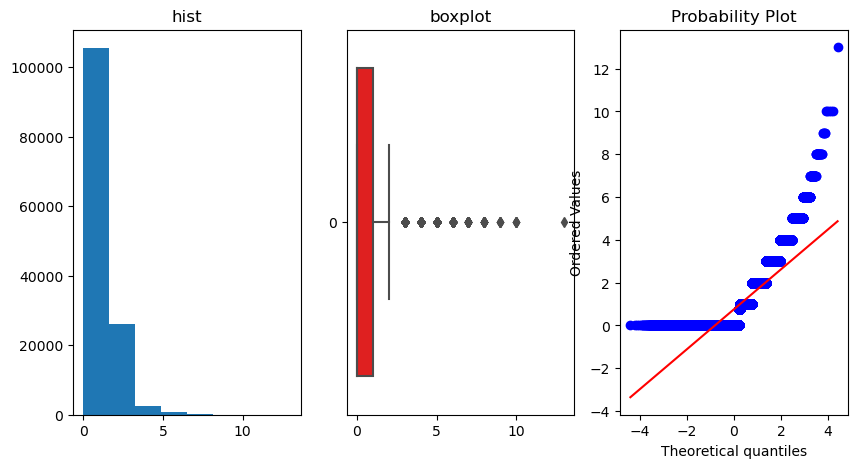

Orginal column


In [1337]:
fun(Training_data_numeric,'NumberOfDependentsmean_replaced')
print('Orginal column')

In [1338]:
# lets take one feature and do variable transformation

In [1339]:
# log technique and boxcox didn't work due to range and positive data

In [1340]:
Training_data_numeric['NumberOfDependentsmean_replaced_yeo'],alpha=stats.yeojohnson(Training_data_numeric['NumberOfDependentsmean_replaced'])

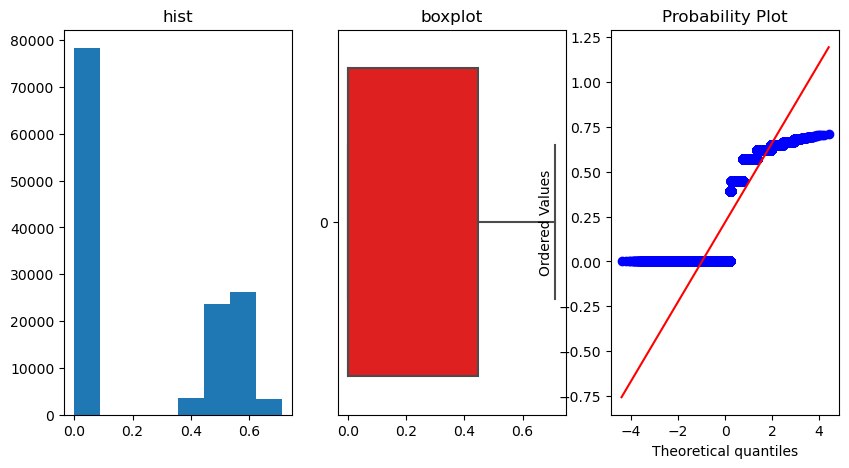

In [1341]:
fun(Training_data_numeric,'NumberOfDependentsmean_replaced_yeo')

In [1342]:
# yeojohnson technique works very well removed the outliers perfectly 

In [1343]:
Training_data_numeric.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_random', 'NumberOfDependentsmean_replaced',
       'NumberOfDependentsmean_replaced_yeo'],
      dtype='object')

In [1344]:
Training_data_numeric=Training_data_numeric.drop(['NumberOfDependentsmean_replaced_yeo'],axis=1)

In [1345]:
Training_data_numeric.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_random', 'NumberOfDependentsmean_replaced'],
      dtype='object')

In [1346]:
def fun(dfs,var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.title("hist")
    dfs[var+'_yeo'].hist(bins=8,grid=False)
    plt.subplot(1,3,2)
    plt.title("boxplot")
    sns.boxplot(dfs[var+'_yeo'],color='r',orient='h')
    plt.subplot(1,3,3)
    stats.probplot(dfs[var+'_yeo'],plot=plt)
    plt.show()

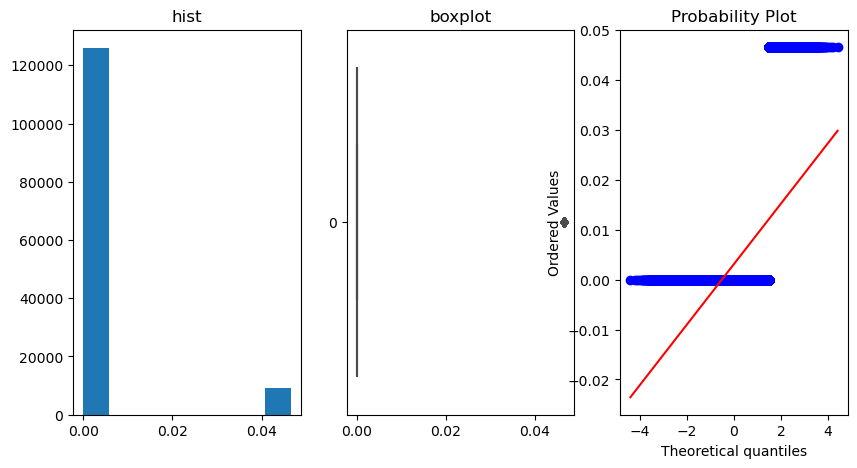

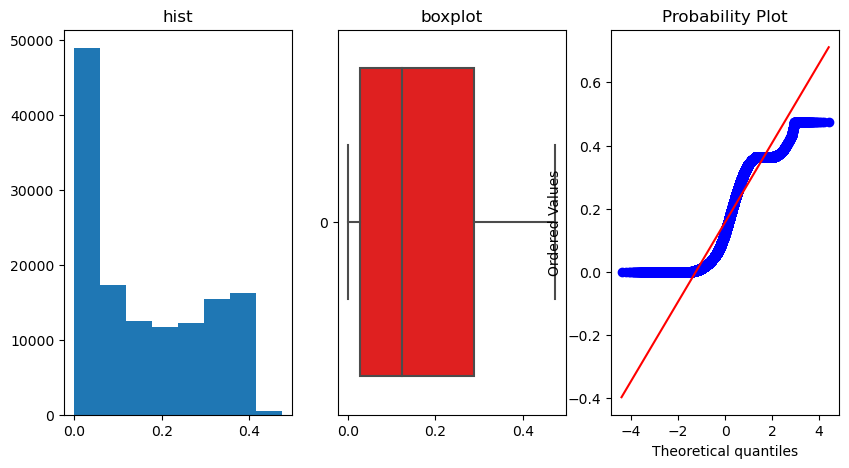

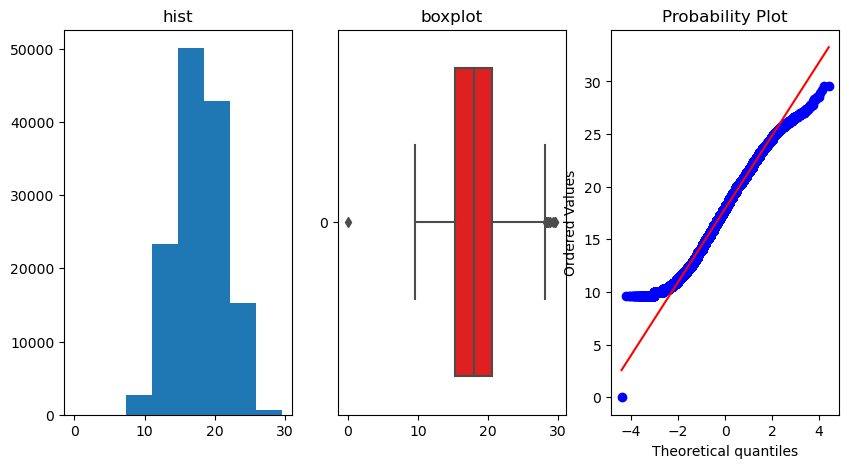

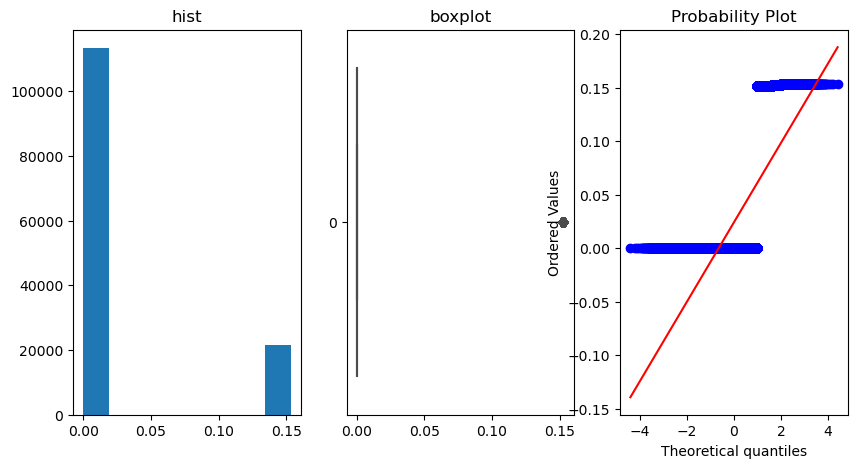

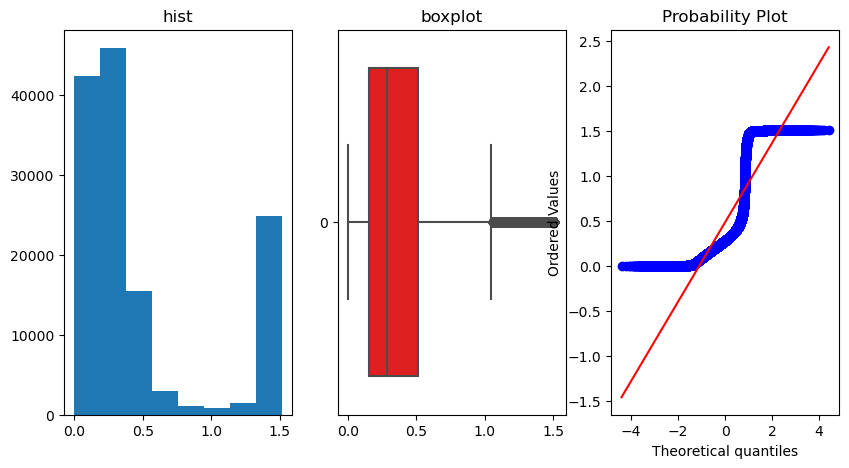

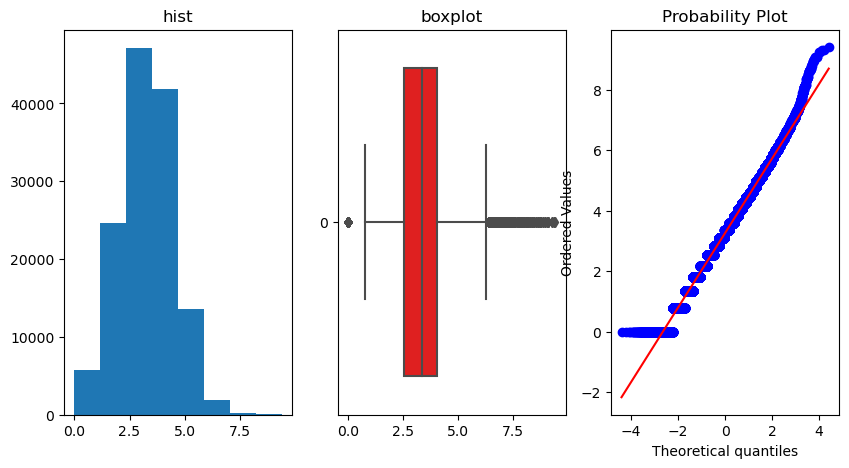

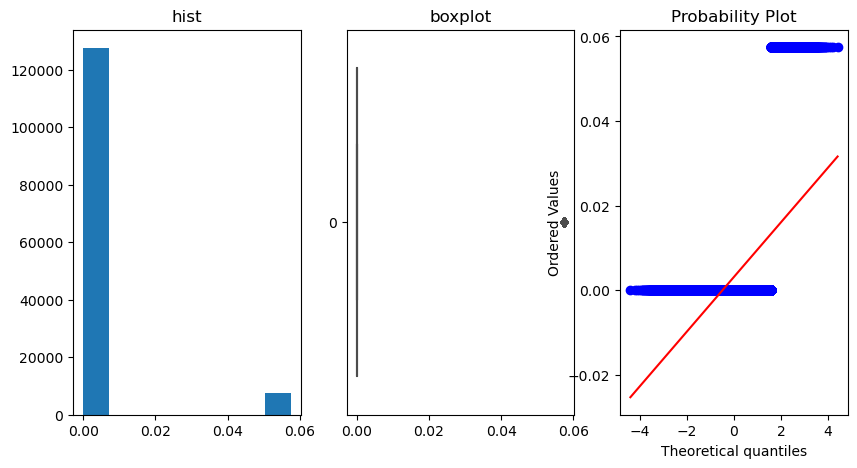

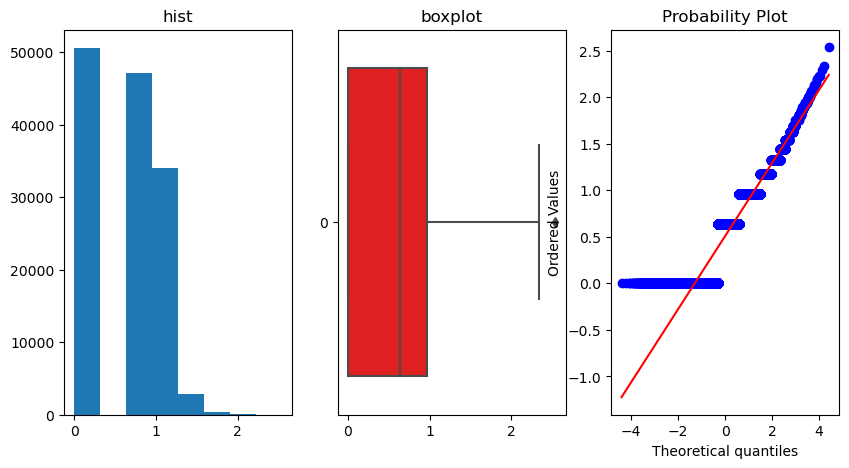

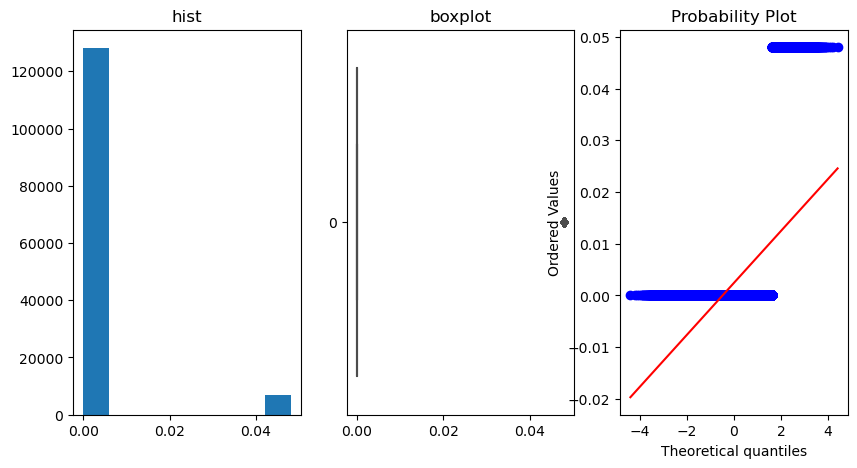

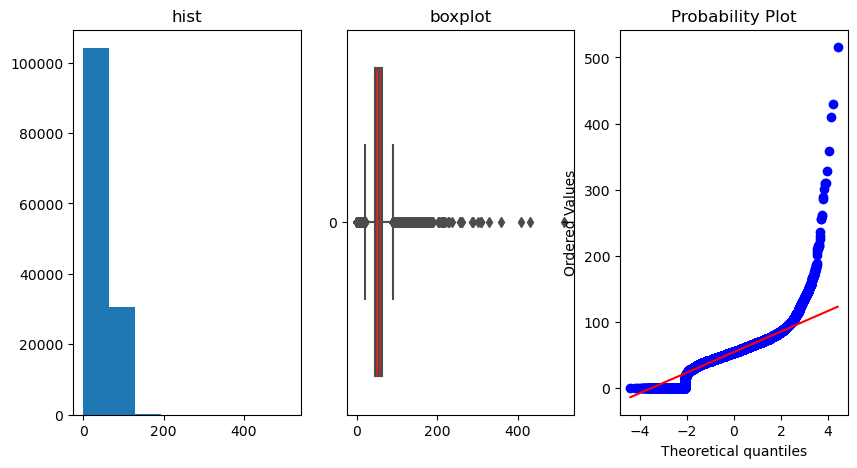

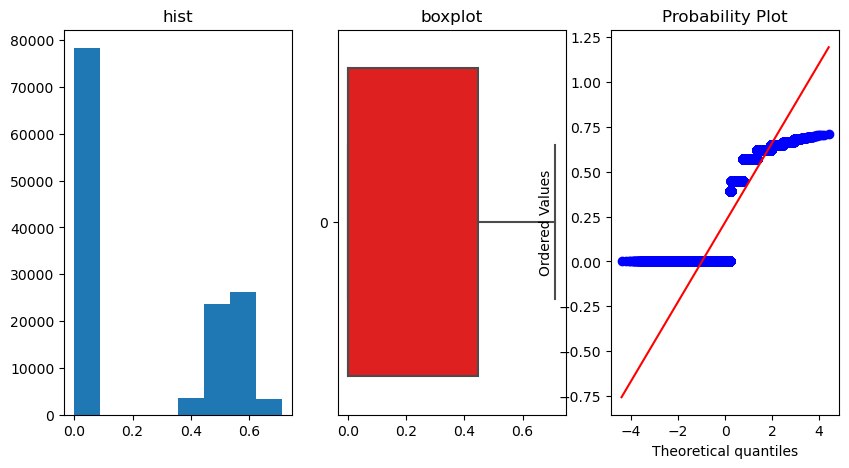

In [1348]:
# LETS apply yeojohnson technique for each variable 
for i in Training_data_numeric.columns:
    Training_data_numeric[i+'_yeo'],alpha=stats.yeojohnson(Training_data_numeric[i])
    fun(Training_data_numeric,i)

In [1349]:
Training_data_numeric.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_random', 'NumberOfDependentsmean_replaced',
       'NPA Status_yeo', 'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo'],
      dtype='object')

In [1350]:
# YeoJOhnson technique gives good results and taking only those YeoJOhnson features
Training_datas=Training_data_numeric[['NPA Status_yeo', 'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo']]

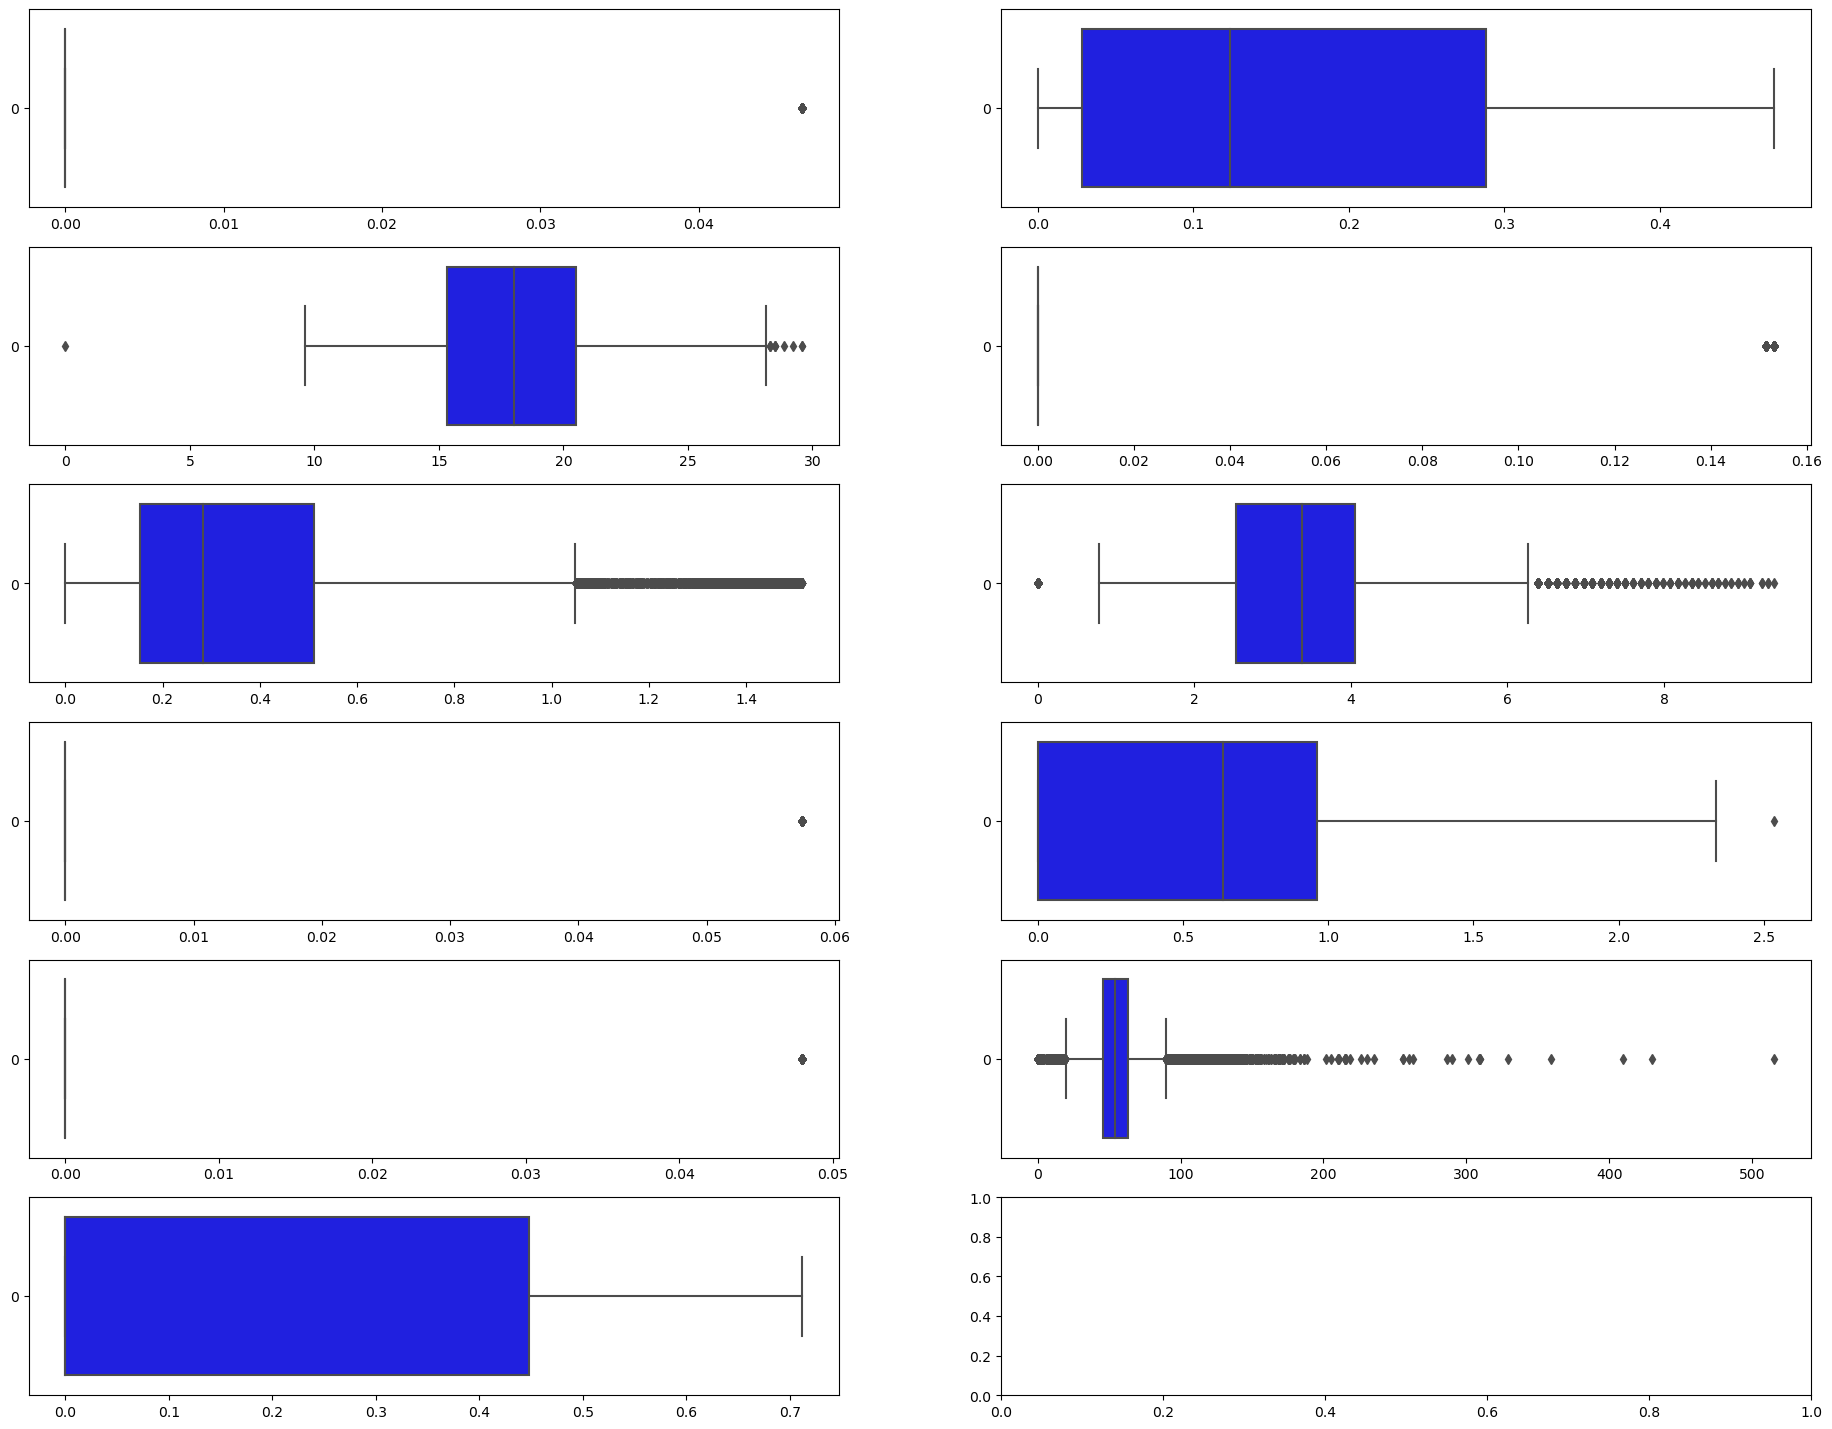

In [1351]:
s=['NPA Status_yeo', 'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo']
fig,ax=plt.subplots(6,2,figsize=(23,18))
for i,subplot in zip(Training_datas.columns,ax.flatten()):
    sns.boxplot(Training_datas[i],ax=subplot,color='b',orient='h')

In [1354]:
# Even those YeoJOhnson technique gives good results but few features has no unique value in data so lets remove them and also 0utlier is there .. 
s[0],s[3],s[6],s[8]

('NPA Status_yeo',
 'NumberOfTime30-59DaysPastDueNotWorse_yeo',
 'NumberOfTimes90DaysLate_yeo',
 'NumberOfTime60-89DaysPastDueNotWorse_yeo')

In [1355]:
print('NPA Status_yeo:',Training_datas['NPA Status_yeo'].unique())
print('NumberOfTimes90DaysLate_yeo',Training_datas['NumberOfTimes90DaysLate_yeo'].unique())
print('NumberOfTime60-89DaysPastDueNotWorse_yeo',Training_datas['NumberOfTime60-89DaysPastDueNotWorse_yeo'].unique())
print('NumberOfTime30-59DaysPastDueNotWorse_yeo:',Training_datas['NumberOfTime30-59DaysPastDueNotWorse_yeo'].unique())
# only NumberOfTime30-59DaysPastDueNotWorse_yeo shows lot of unique 

NPA Status_yeo: [-0.          0.04651844]
NumberOfTimes90DaysLate_yeo [-0.          0.05744611  0.05744644  0.05744644  0.05744644  0.05744644
  0.05744644  0.05744644  0.05744644]
NumberOfTime60-89DaysPastDueNotWorse_yeo [-0.          0.04799468  0.04799471  0.04799471  0.04799471  0.04799471
  0.04799471]
NumberOfTime30-59DaysPastDueNotWorse_yeo: [-0.          0.15156841  0.15311312  0.15322976  0.153213    0.15322684
  0.15323104  0.15323085  0.15323095  0.15323057  0.153231    0.15323104
  0.15323103  0.15323104  0.15323102  0.15323103]


In [1356]:
Training_datas=Training_datas.drop(['NPA Status_yeo','NumberOfTimes90DaysLate_yeo','NumberOfTime60-89DaysPastDueNotWorse_yeo'],axis=1)

In [1358]:
Training_datas.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo'],
      dtype='object')

In [1359]:
# Even those YeoJOhnson technique gives good results but their is some outliers 
# IQR technique
def quan(dp,var):
    lower = dp[var].quantile(0.05)
    upper = dp[var].quantile(0.95)
    return upper,lower
upper,lower=quan(Training_datas,'RevolvingUtilizationOfUnsecuredLines_yeo')

<Axes: >

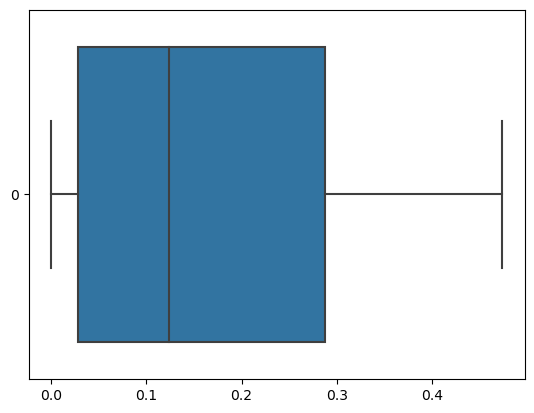

In [1363]:
sns.boxplot(Training_datas['RevolvingUtilizationOfUnsecuredLines_yeo'],orient='h')

In [1364]:
for i in Training_datas.columns:
    upper,lower=quan(Training_datas,i)
    Training_datas[i]=np.where(Training_datas[i]>upper,upper,np.where(Training_datas[i]<lower,lower,Training_datas[i]))

In [1365]:
Training_datas.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo'],
      dtype='object')

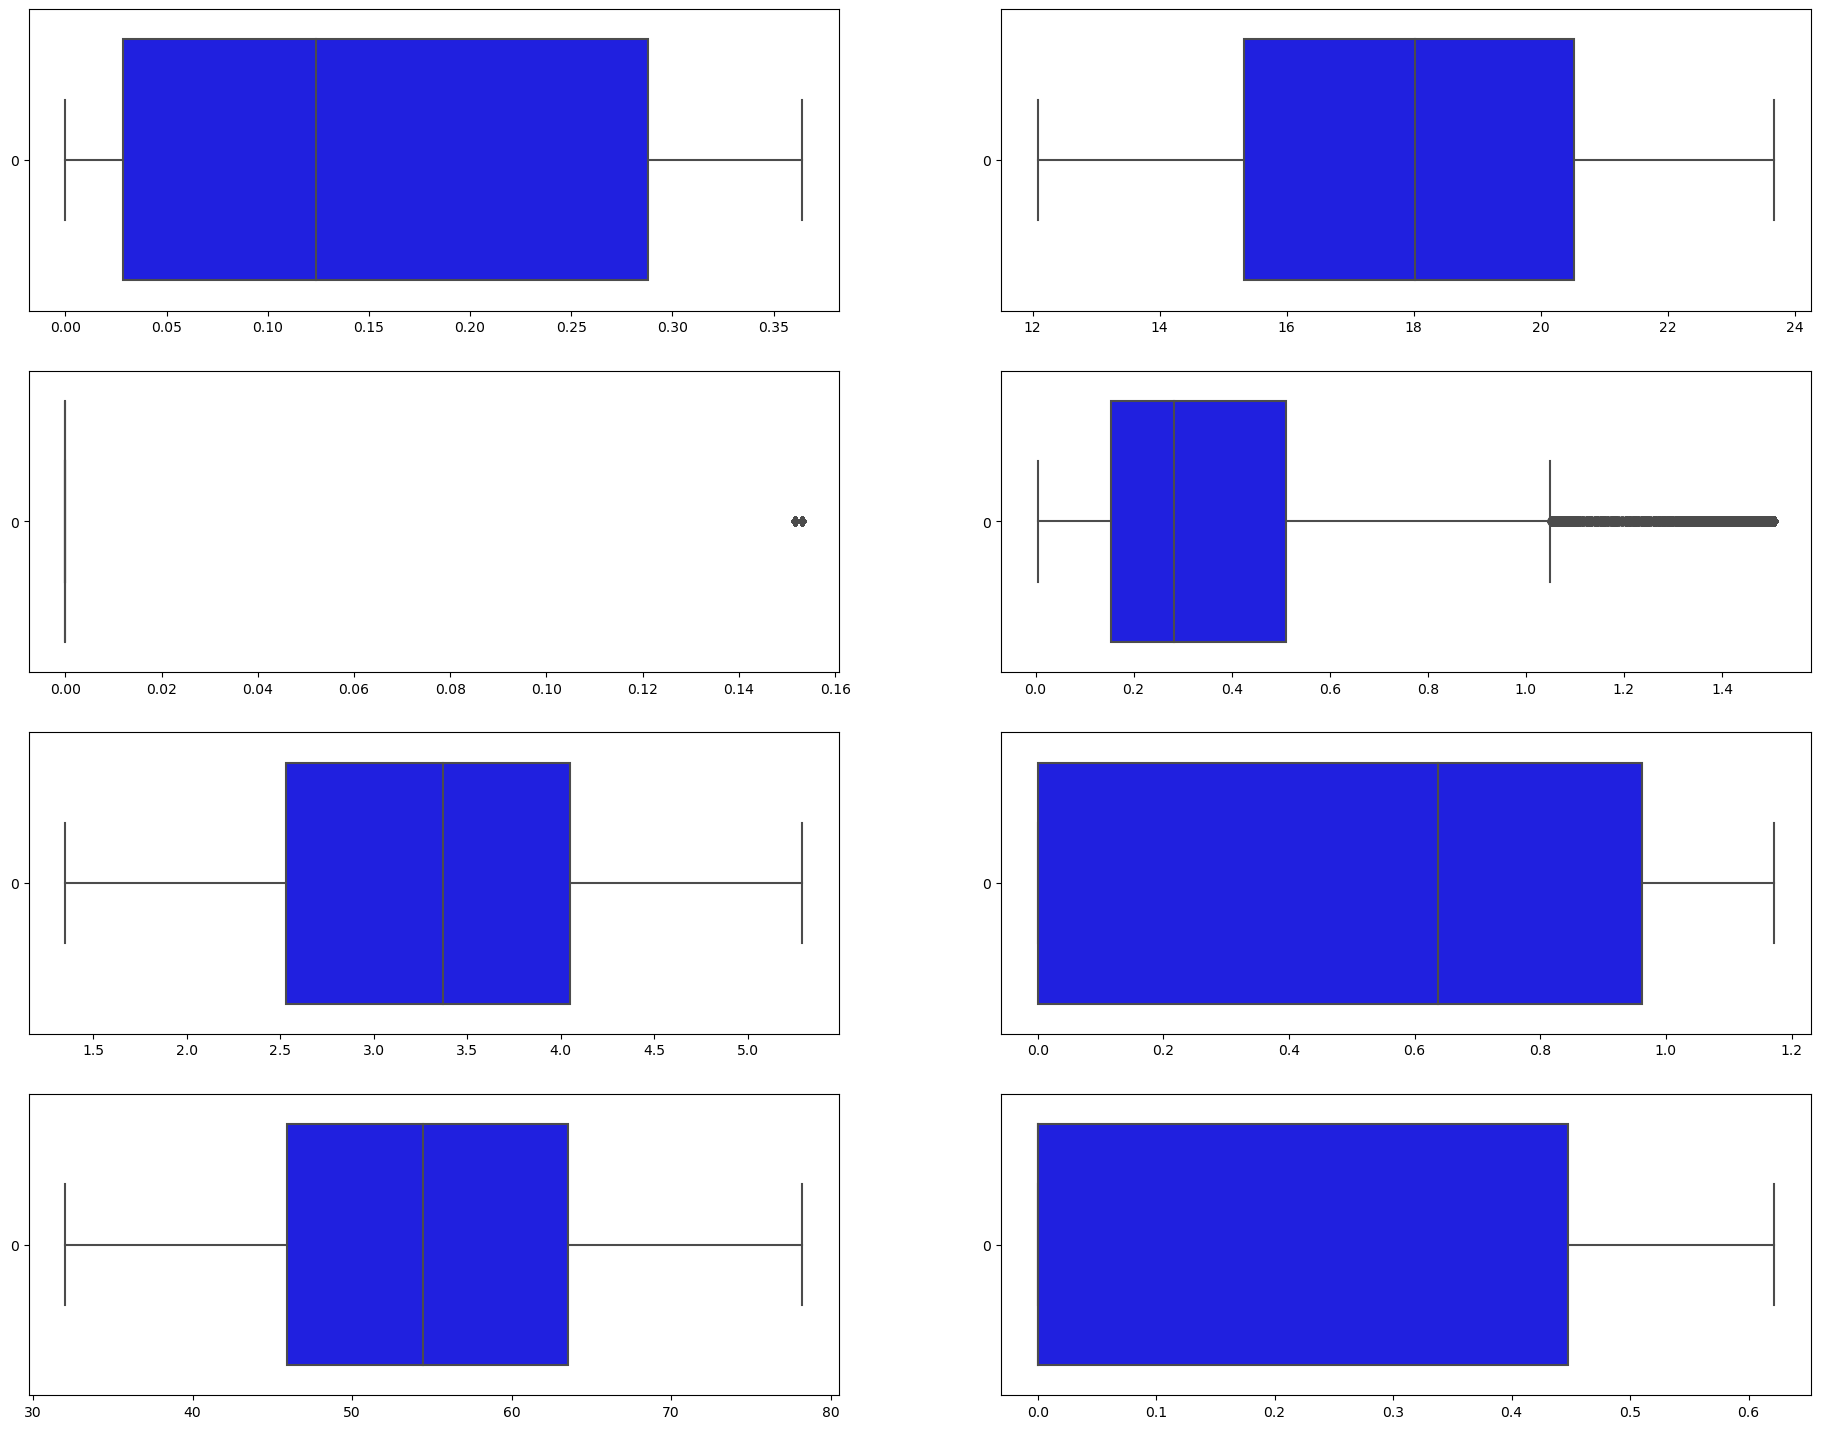

In [1366]:
fig,ax=plt.subplots(4,2,figsize=(23,18))
for i,subplot in zip(Training_datas.columns,ax.flatten()):
    sns.boxplot(Training_datas[i],ax=subplot,color='b',orient='h')

In [1367]:
Testing_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad', 'MonthlyIncome_random'],
      dtype='object')

In [1368]:
Testing_data_numeric=Testing_data[['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','MonthlyIncome_random','NumberOfDependents']]

In [1369]:
Testing_data_numeric.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'MonthlyIncome_random', 'NumberOfDependents'],
      dtype='object')

<Axes: xlabel='NumberOfTime30-59DaysPastDueNotWorse'>

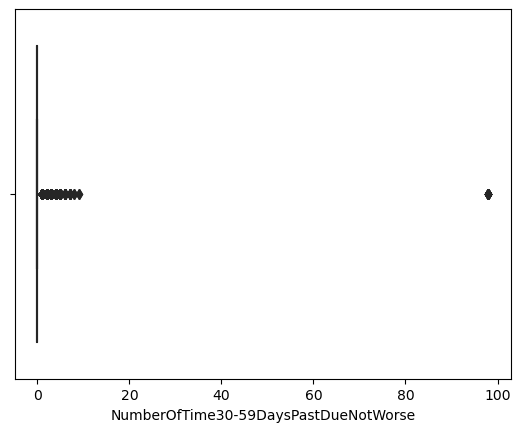

In [1370]:
sns.boxplot(x='NumberOfTime30-59DaysPastDueNotWorse',data=Testing_data,color='g')

In [1371]:
# same for Testing Data
for i in Testing_data_numeric.columns:
    Testing_data_numeric[i+'yeo'],alpha=stats.yeojohnson(Testing_data_numeric[i])

In [1372]:
Testing_data_numeric.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'MonthlyIncome_random', 'NumberOfDependents',
       'RevolvingUtilizationOfUnsecuredLinesyeo', 'ageyeo',
       'NumberOfTime30-59DaysPastDueNotWorseyeo', 'DebtRatioyeo',
       'NumberOfOpenCreditLinesAndLoansyeo', 'NumberRealEstateLoansOrLinesyeo',
       'MonthlyIncome_randomyeo', 'NumberOfDependentsyeo'],
      dtype='object')

In [1373]:
Testing_data_num=Testing_data_numeric[['RevolvingUtilizationOfUnsecuredLinesyeo', 'ageyeo',
       'NumberOfTime30-59DaysPastDueNotWorseyeo', 'DebtRatioyeo',
       'NumberOfOpenCreditLinesAndLoansyeo', 'NumberRealEstateLoansOrLinesyeo',
       'MonthlyIncome_randomyeo', 'NumberOfDependentsyeo']]

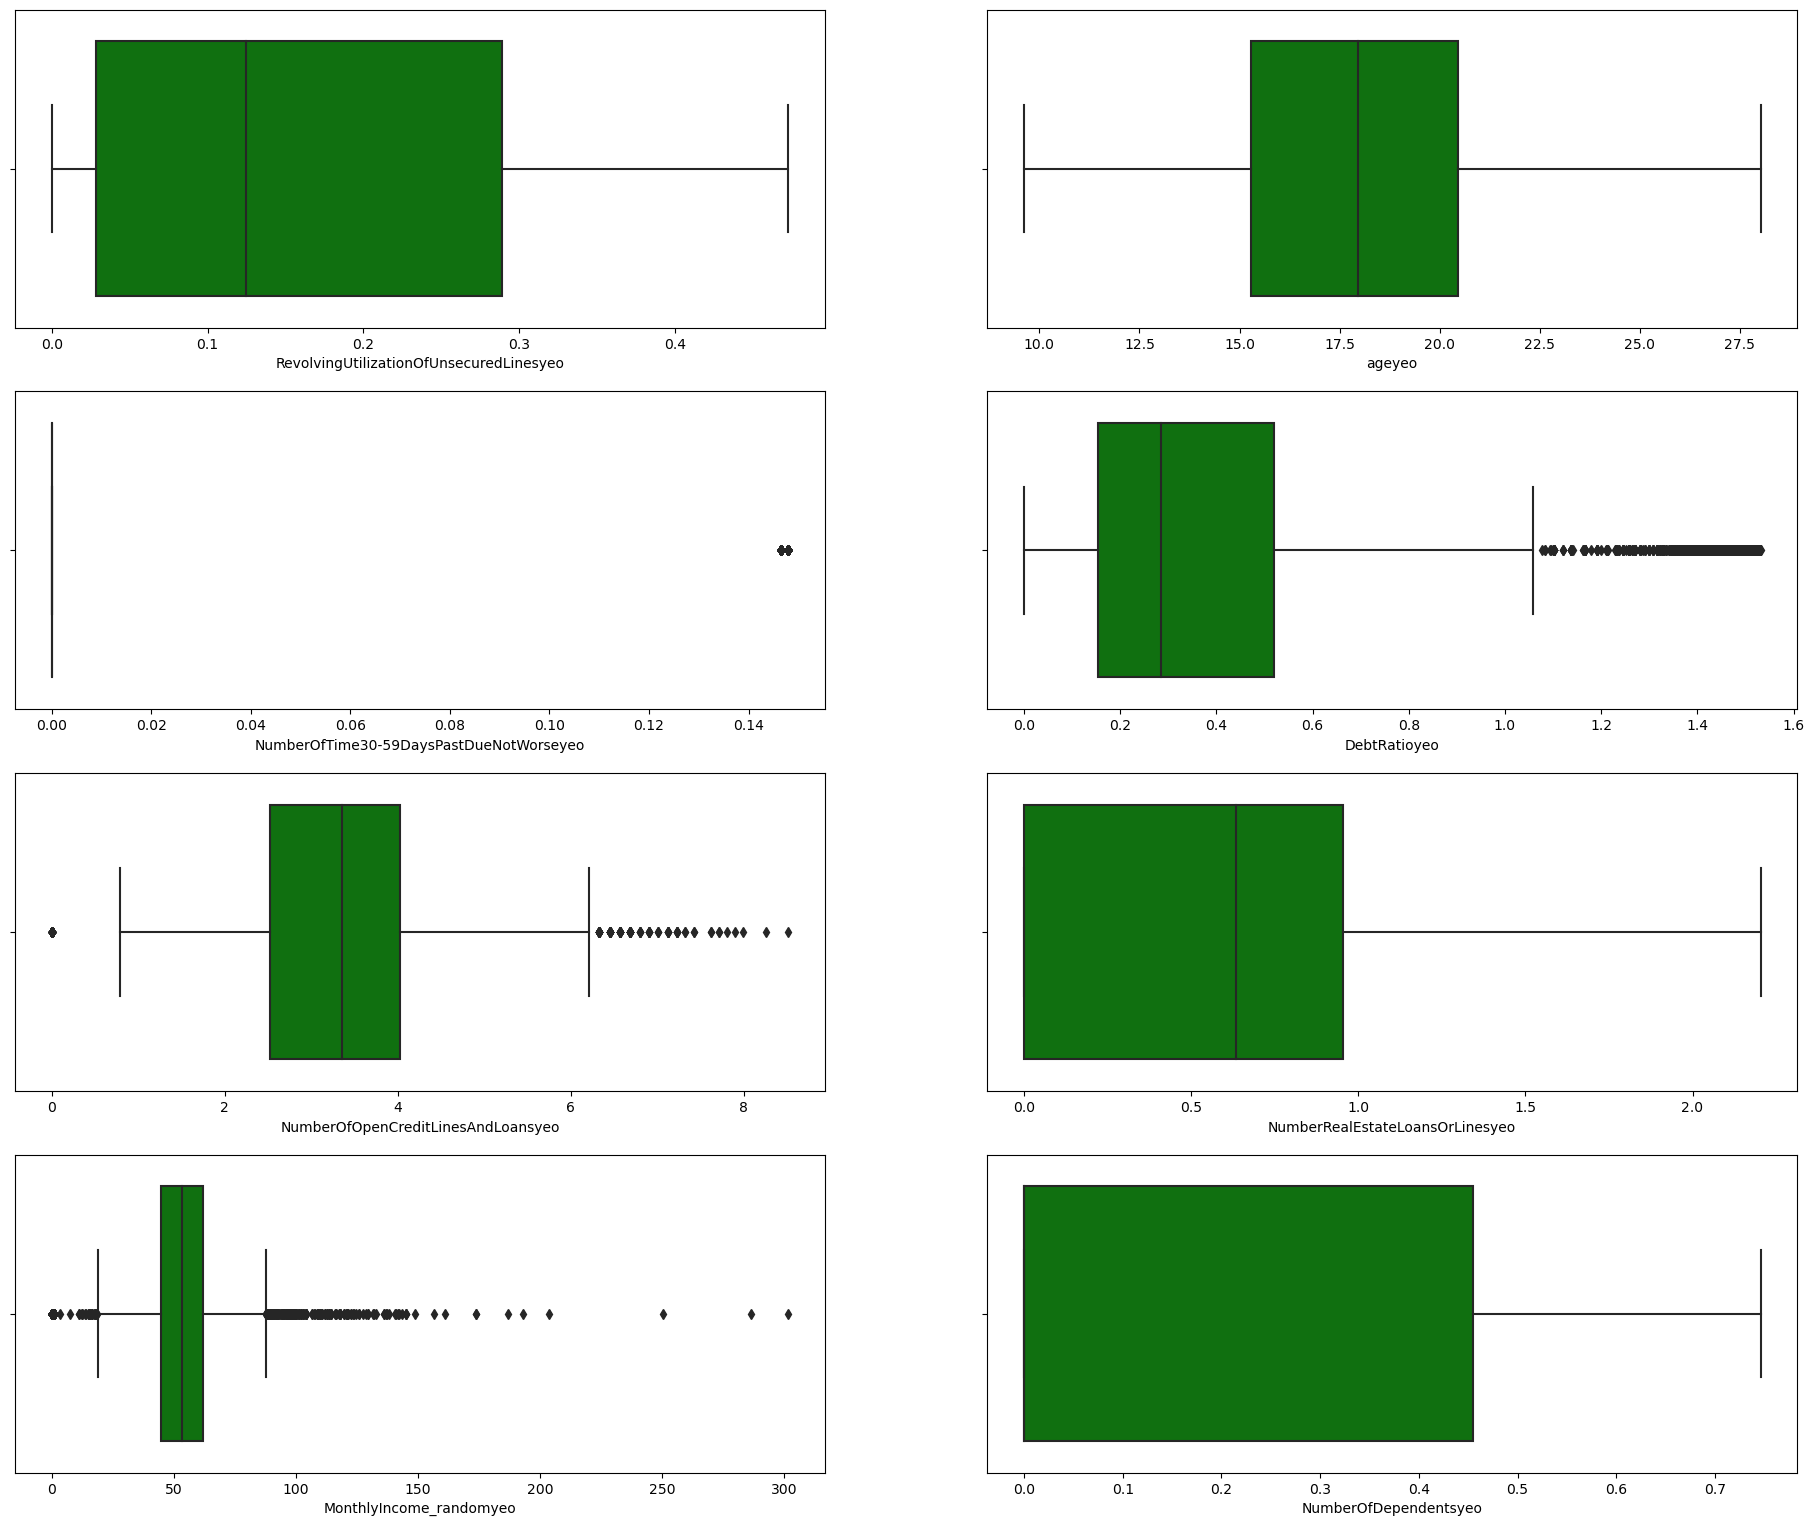

In [1374]:
fig,ax=plt.subplots(4,2,figsize=(23,19))
for i,subplot in zip(Testing_data_num.columns,ax.flatten()):
    sns.boxplot(data=Testing_data_num,x=i,ax=subplot,color='g')

In [1375]:
Testing_data_num.columns

Index(['RevolvingUtilizationOfUnsecuredLinesyeo', 'ageyeo',
       'NumberOfTime30-59DaysPastDueNotWorseyeo', 'DebtRatioyeo',
       'NumberOfOpenCreditLinesAndLoansyeo', 'NumberRealEstateLoansOrLinesyeo',
       'MonthlyIncome_randomyeo', 'NumberOfDependentsyeo'],
      dtype='object')

In [1376]:
# iqr
def Iqr(Testing_data_num,var):
    lower=Testing_data_num[var].quantile(0.05)
    upper=Testing_data_num[var].quantile(0.95)
    return upper,lower


In [1377]:
for i in Testing_data_num.columns:
    upper,lower=Iqr(Testing_data_num,i)
    Testing_data_num[i]=np.where(Testing_data_num[i]>upper,upper,np.where(Testing_data_num[i]<lower,lower,Testing_data_num[i]))   

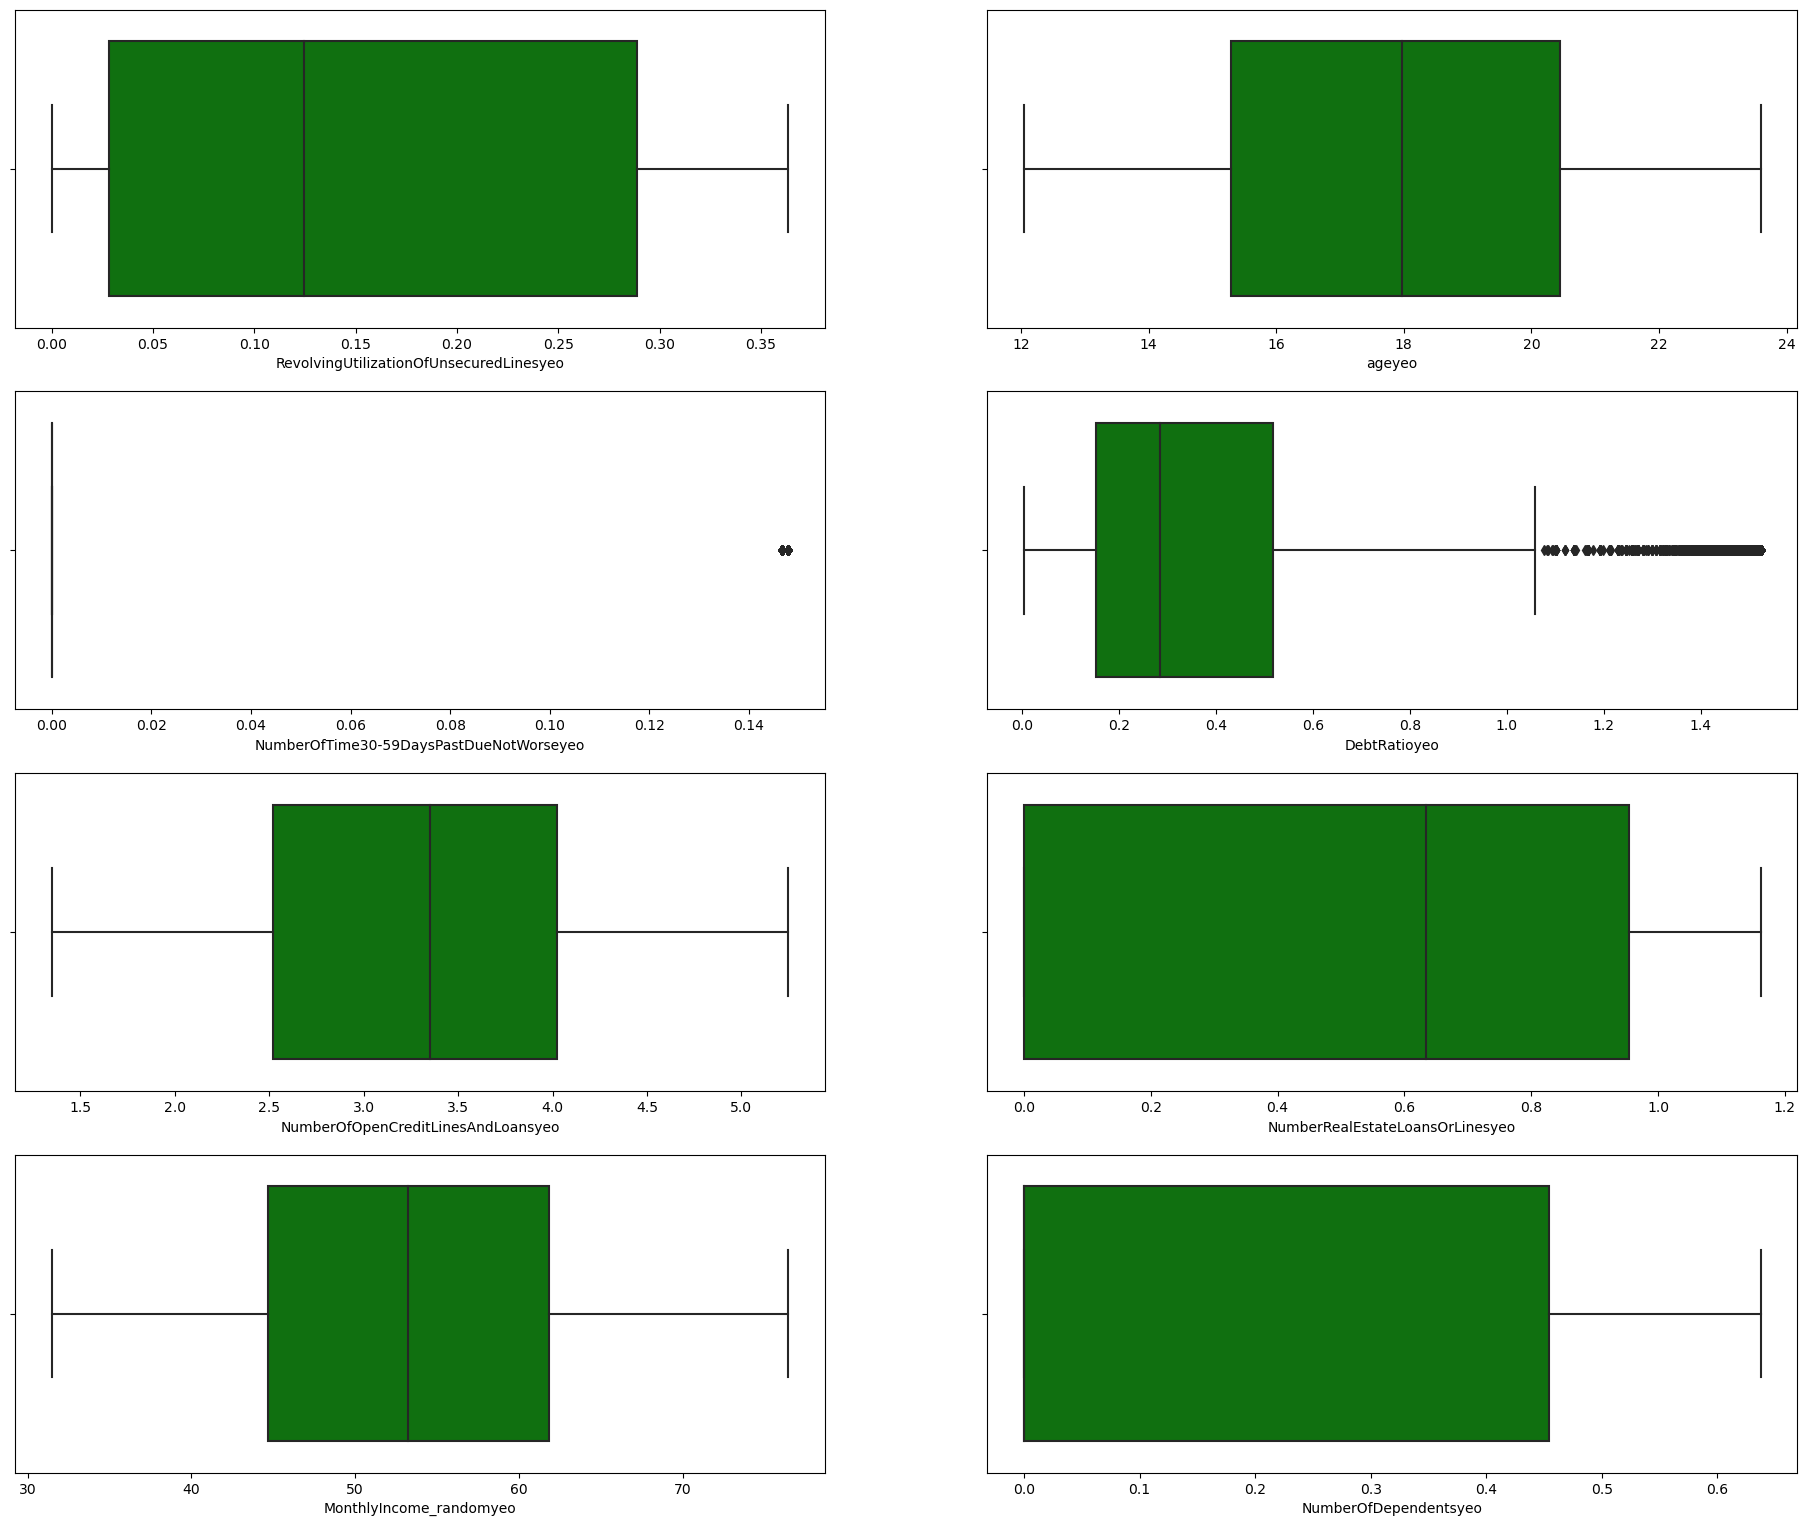

In [1378]:
# after plotting and do boxplot a
fig,ax=plt.subplots(4,2,figsize=(23,19))
for i,subplot in zip(Testing_data_num.columns,ax.flatten()):
    sns.boxplot(data=Testing_data_num,x=i,ax=subplot,color='g')

# Converting Categorical to Numeric columns

In [1379]:
Train_cat_cols.columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Good_Bad'],
      dtype='object')

In [1380]:
# ONEHOTENCODER FOR Traning DATA
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
trans=OneHotEncoder(drop='first',categories='auto')
trans.fit(Train_cat_cols[['Gender','Rented_OwnHouse','Region']])
cat=trans.transform(Train_cat_cols[['Gender','Rented_OwnHouse','Region']])
cat=cat.toarray()
cat=pd.DataFrame(cat,index=Train_cat_cols.index)
cat.columns=trans.get_feature_names_out()

In [1381]:
cat.columns

Index(['Gender_Male', 'Rented_OwnHouse_Rented', 'Region_East', 'Region_North',
       'Region_South', 'Region_West'],
      dtype='object')

In [1382]:
Train_cat_cols=pd.concat([Train_cat_cols,cat],axis=1)

In [1383]:
Train_cat_cols.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West
135928,Male,West,Rented,Non-officer,Professional,Good,1.0,1.0,0.0,0.0,0.0,1.0
95567,Female,Central,Rented,Non-officer,Graduate,Good,0.0,1.0,0.0,0.0,0.0,0.0
80798,Female,Central,Rented,Officer2,Professional,Good,0.0,1.0,0.0,0.0,0.0,0.0
98512,Male,Central,Ownhouse,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0,0.0
66964,Male,Central,Ownhouse,Officer2,Professional,Good,1.0,0.0,0.0,0.0,0.0,0.0


In [1384]:
# OrdinalEncoder FOR Traning DATA
od=OrdinalEncoder()
od_data=od.fit_transform(Train_cat_cols[['Occupation', 'Education']])
od_data=pd.DataFrame(od_data,index=Train_cat_cols.index)
od_data.columns=['Occupations', 'Educations']


In [1385]:
Train_cat_cols=pd.concat([Train_cat_cols,od_data],axis=1)
Train_cat_cols.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupations,Educations
135928,Male,West,Rented,Non-officer,Professional,Good,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
95567,Female,Central,Rented,Non-officer,Graduate,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
80798,Female,Central,Rented,Officer2,Professional,Good,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0
98512,Male,Central,Ownhouse,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66964,Male,Central,Ownhouse,Officer2,Professional,Good,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0


In [1386]:
# LABELENCODER FOR DEPENDENT Training_data
le=LabelEncoder()
label_code=le.fit_transform(Train_cat_cols['Good_Bad'])
label_code=pd.DataFrame(label_code,index=Train_cat_cols.index)
label_code.columns=['Good_Bad_changed']

In [1387]:
Train_cat_cols=pd.concat([Train_cat_cols,label_code],axis=1)
Train_cat_cols.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupations,Educations,Good_Bad_changed
135928,Male,West,Rented,Non-officer,Professional,Good,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
95567,Female,Central,Rented,Non-officer,Graduate,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
80798,Female,Central,Rented,Officer2,Professional,Good,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,1
98512,Male,Central,Ownhouse,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66964,Male,Central,Ownhouse,Officer2,Professional,Good,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1


In [1388]:
Train_cat_cols.columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Good_Bad', 'Gender_Male', 'Rented_OwnHouse_Rented', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Occupations',
       'Educations', 'Good_Bad_changed'],
      dtype='object')

In [1389]:
Train_cat_cols=Train_cat_cols.drop(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Good_Bad'],axis=1)

In [1390]:
Train_cat_cols.head()

,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupations,Educations,Good_Bad_changed
135928,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
95567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
80798,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,1
98512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66964,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1


In [1391]:
final_training_data=pd.concat([Training_datas,Train_cat_cols],axis=1)

# Apply same conversion to categorical data


In [1392]:
Testing_data_cate=Testing_data.select_dtypes(include='object')
Testing_data_cate.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
19470,Female,North,Ownhouse,Officer1,Post-Grad,Good
26019,Female,North,Rented,Self_Emp,Graduate,Good
146636,Male,South,Ownhouse,Self_Emp,Professional,Good
2258,Male,South,Ownhouse,Self_Emp,PhD,Good
133966,Male,West,Ownhouse,Officer1,Professional,Good


In [1393]:
# ONEHOTENCODER FOR TESTING DATA
oh=trans.transform(Testing_data_cate[['Gender','Rented_OwnHouse','Region']])
oh=oh.toarray()
oh=pd.DataFrame(oh,index=Testing_data_cate.index)
oh.columns=trans.get_feature_names_out()

In [1394]:
Testing_data_cate=pd.concat([Testing_data_cate,oh],axis=1)

In [1395]:
# ORDINALENCODER FOR TESTING DATA
od_data=od.transform(Testing_data_cate[['Occupation','Education']])
od_data=pd.DataFrame(od_data,index=Testing_data_cate.index)
od_data.columns=['Occupations','Educations']

In [1396]:
Testing_data_cate=pd.concat([Testing_data_cate,od_data],axis=1)

In [1397]:
# LABELENCODER FOR DEPENDENT testing_data
le_data=le.transform(Testing_data_cate['Good_Bad'])
le_data=pd.DataFrame(le_data,index=Testing_data_cate.index)
le_data.columns=['Good_Bad_changed']

In [1398]:
Testing_data_cate=pd.concat([Testing_data_cate,le_data],axis=1)

In [1399]:
Testing_data_cate.columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Good_Bad', 'Gender_Male', 'Rented_OwnHouse_Rented', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Occupations',
       'Educations', 'Good_Bad_changed'],
      dtype='object')

In [1400]:
Testing_data_cate=Testing_data_cate.drop(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Good_Bad'],axis=1)

In [1401]:
Testing_data_num.columns

Index(['RevolvingUtilizationOfUnsecuredLinesyeo', 'ageyeo',
       'NumberOfTime30-59DaysPastDueNotWorseyeo', 'DebtRatioyeo',
       'NumberOfOpenCreditLinesAndLoansyeo', 'NumberRealEstateLoansOrLinesyeo',
       'MonthlyIncome_randomyeo', 'NumberOfDependentsyeo'],
      dtype='object')

In [1403]:
Final_testing_data=Testing_data_num[['RevolvingUtilizationOfUnsecuredLinesyeo', 'ageyeo',
       'NumberOfTime30-59DaysPastDueNotWorseyeo', 'DebtRatioyeo',
       'NumberOfOpenCreditLinesAndLoansyeo', 'NumberRealEstateLoansOrLinesyeo',
       'MonthlyIncome_randomyeo', 'NumberOfDependentsyeo']]

In [1404]:
Final_testing_data=pd.concat([Final_testing_data,Testing_data_cate],axis=1)

In [1405]:
# finally converted categorical to Numeric columns
Final_testing_data.head()

,RevolvingUtilizationOfUnsecuredLinesyeo,ageyeo,NumberOfTime30-59DaysPastDueNotWorseyeo,DebtRatioyeo,NumberOfOpenCreditLinesAndLoansyeo,NumberRealEstateLoansOrLinesyeo,MonthlyIncome_randomyeo,NumberOfDependentsyeo,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupations,Educations,Good_Bad_changed
19470,0.005048,19.563571,-0.000000,1.521197,5.247864,0.954008,31.461708,0.637243,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1
26019,0.348355,17.256184,-0.000000,0.283114,4.022465,0.633581,64.669521,0.637243,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1
146636,0.034936,16.531791,-0.000000,0.255696,3.097723,0.633581,73.744899,-0.000000,1.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,1
2258,0.031019,21.095288,-0.000000,0.423682,3.589869,-0.000000,52.503166,-0.000000,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1
133966,0.347935,22.775733,0.147886,0.364289,4.221561,0.633581,76.460277,-0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1


 Finally completed null values ,conversion categorical to numeric variable

In [1406]:
final_training_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations', 'Good_Bad_changed'],
      dtype='object')

In [978]:
Final_testing_data.columns

Index(['RevolvingUtilizationOfUnsecuredLinesyeo', 'ageyeo',
       'NumberOfTime30-59DaysPastDueNotWorseyeo', 'DebtRatioyeo',
       'NumberOfOpenCreditLinesAndLoansyeo', 'NumberRealEstateLoansOrLinesyeo',
       'MonthlyIncome_randomyeo', 'NumberOfDependentsyeo', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations', 'Good_Bad_changed'],
      dtype='object')

# Feature Scaling

In [1407]:
X_train=final_training_data.iloc[:,:-1]
Y_train=final_training_data.iloc[:,-1]

In [1408]:
X_test=Final_testing_data.iloc[:,:-1]
Y_test=Final_testing_data.iloc[:,-1]

In [1409]:
# scaling down the values will gives good results 
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train_data=s.fit_transform(X_train)
X_test_data=s.transform(X_test)

In [1410]:
X_train_data=pd.DataFrame(X_train_data,columns=X_train.columns)

In [1411]:
X_test_data=pd.DataFrame(X_test_data,columns=X_test.columns)

After feature Scaling plot them by boxplot

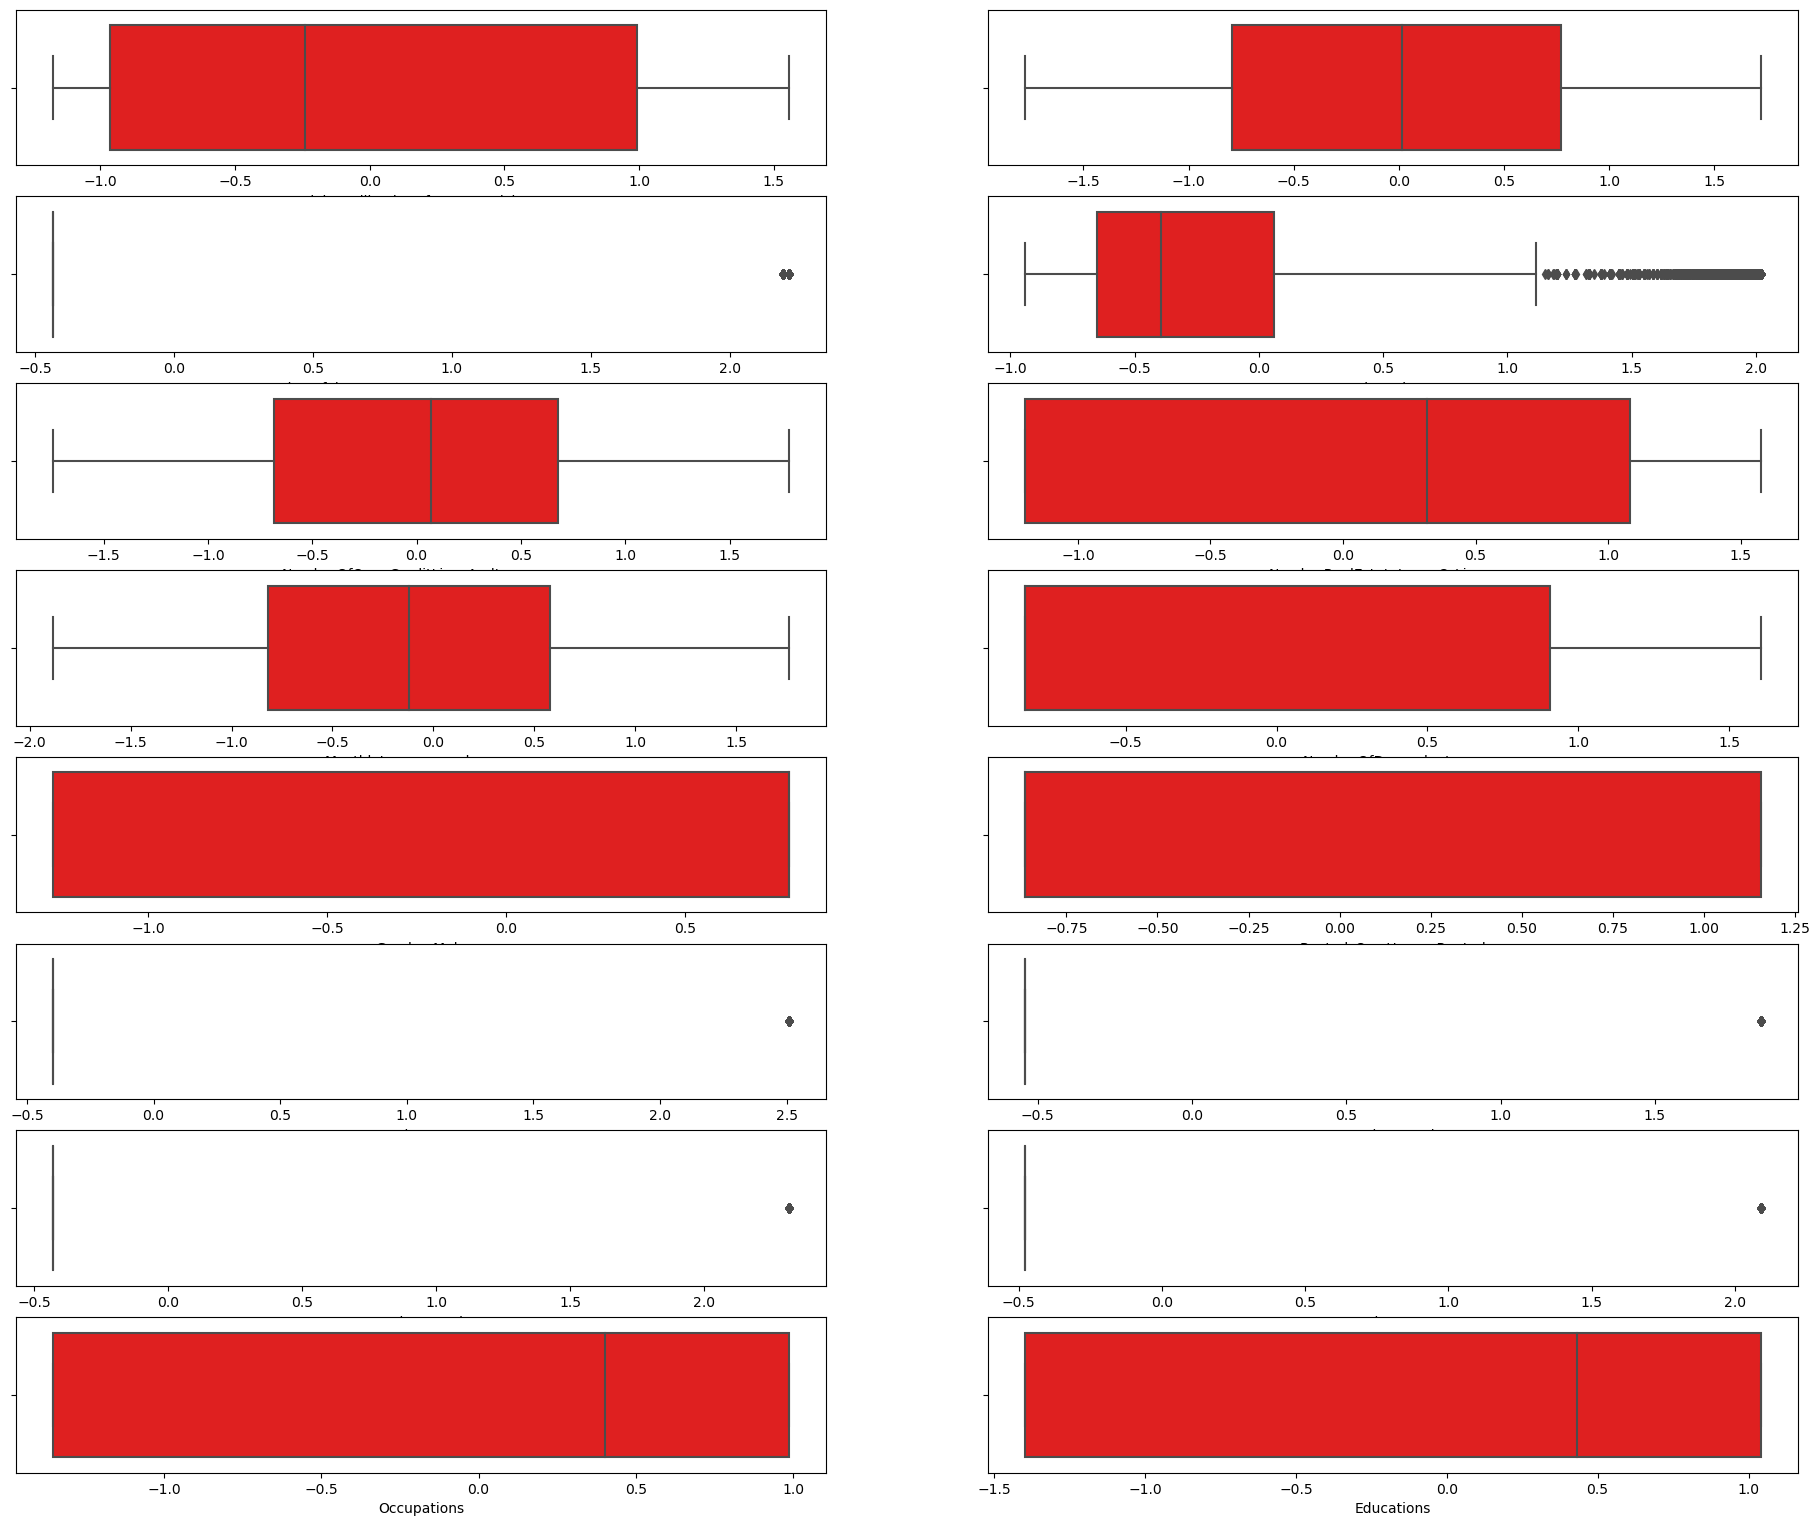

In [1412]:
fig,ax=plt.subplots(8,2,figsize=(23,19))
for i,subplot in zip(X_test_data.columns,ax.flatten()):
    sns.boxplot(data=X_test_data,x=i,orient='h',color='r',ax=subplot)

# Feature Selection

### 1.variance Threshold

In [1413]:
# variance Threshold is a simple approach for feature selection it removes the feature which has low variances or removes the feature which does'nt meet variance threshold value

In [1414]:
from sklearn.feature_selection import VarianceThreshold

In [1415]:
var=VarianceThreshold(threshold=0.0)
var.fit(X_train_data)

VarianceThreshold()

In [1416]:
c=X_train_data.columns[var.get_support()]# these fetures are above 0 needed columns
d=X_train_data.columns[~var.get_support()]# these fetures are less than 0 unwanted columns

In [1417]:
d

Index([], dtype='object')

In [1429]:
quasi=VarianceThreshold(threshold=0.1)
quasi.fit(X_train_data)

VarianceThreshold(threshold=0.1)

In [1430]:
c1=X_train_data.columns[var_1.get_support()]# these fetures are above 0 needed columns
d1=X_train_data.columns[~var_1.get_support()]# these fetures are less than 0 unwanted columns

In [1431]:
c1

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations'],
      dtype='object')

In [1432]:
keep = X_train_data.columns[quasi.get_support()]
keep

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations'],
      dtype='object')

In [1433]:
remove = X_train_data.columns[~quasi.get_support()]
remove

Index([], dtype='object')

In [1434]:
X_train_data=X_train_data.drop(['NumberOfTime30-59DaysPastDueNotWorse_yeo'],axis=1)
X_test_data=X_test_data.drop(['NumberOfTime30-59DaysPastDueNotWorseyeo'],axis=1)

In [1435]:
X_train_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations'],
      dtype='object')

In [1436]:
X_test_data.shape

(15001, 15)

In [1437]:
X_train_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations'],
      dtype='object')

# 2.Feature Selection using Correlation 

In [1438]:
import feature_engine
from feature_engine.selection import DropCorrelatedFeatures

In [1439]:
l1=DropCorrelatedFeatures(method='pearson',missing_values = 'ignore',threshold= 0.85)

In [1441]:
correlat=l1.fit(X_train_data[['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations']])

In [1442]:
correlat.features_to_drop_

set()

# 3.1.Hypothesis testing for Numeric

In [1443]:
# Lets do Correlation in Pearson Technique and p_value=0.05 if it is greater null hypothesis is rejected and if lesser null hypothesis is selected
import scipy
from scipy.stats import pearsonr

In [1444]:
training_data_numeric=X_train_data[['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_random_yeo',
       'NumberOfDependentsmean_replaced_yeo', 'Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations']]
corr=[]
for i in training_data_numeric.columns:
    cor=pearsonr(training_data_numeric[i],Y_train)
    corr.append(cor)

In [1445]:
corr=np.array(corr)
corr

array([[-2.52838031e-01,  0.00000000e+00],
       [ 1.16747092e-01,  0.00000000e+00],
       [ 4.80452286e-03,  7.75164297e-02],
       [ 4.18612064e-02,  1.99065337e-53],
       [ 3.99355625e-02,  8.79704974e-49],
       [ 5.30219662e-02,  1.21114330e-84],
       [-4.18281128e-02,  2.40251856e-53],
       [-4.47985959e-03,  9.97653161e-02],
       [-3.42289138e-03,  2.08522711e-01],
       [ 5.12567587e-02,  3.22484825e-79],
       [-2.21863381e-02,  3.55949863e-16],
       [-9.98276031e-05,  9.70741329e-01],
       [-2.05737600e-01,  0.00000000e+00],
       [-1.52453732e-03,  5.75381326e-01],
       [ 3.46392225e-02,  3.98129125e-37]])

In [1446]:
p_value_num=pd.Series(corr[:,1],index=training_data_numeric.columns)
p_value_num

RevolvingUtilizationOfUnsecuredLines_yeo    0.000000e+00
age_yeo                                     0.000000e+00
DebtRatio_yeo                               7.751643e-02
NumberOfOpenCreditLinesAndLoans_yeo         1.990653e-53
NumberRealEstateLoansOrLines_yeo            8.797050e-49
MonthlyIncome_random_yeo                    1.211143e-84
NumberOfDependentsmean_replaced_yeo         2.402519e-53
Gender_Male                                 9.976532e-02
Rented_OwnHouse_Rented                      2.085227e-01
Region_East                                 3.224848e-79
Region_North                                3.559499e-16
Region_South                                9.707413e-01
Region_West                                 0.000000e+00
Occupations                                 5.753813e-01
Educations                                  3.981291e-37
dtype: float64

In [1447]:
p_value_num=p_value_num.sort_values(ascending=True)


<Axes: >

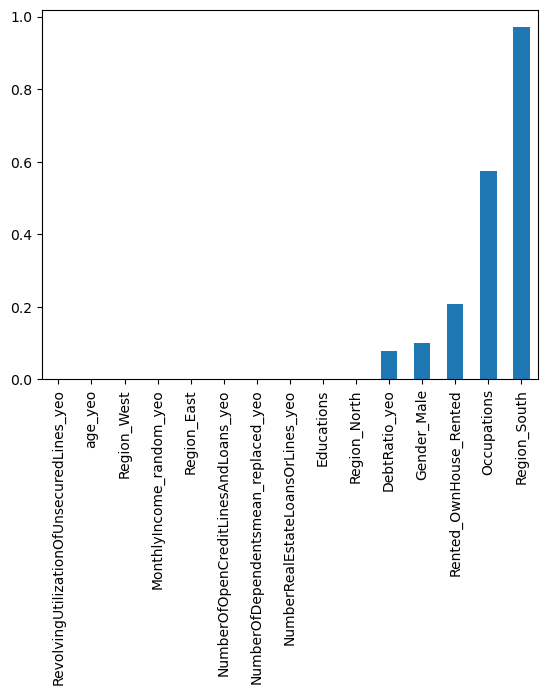

In [1448]:
p_value_num.plot.bar()

In [294]:
X_train_data=X_train_data.drop(['DebtRatio_yeo'],axis=1)
X_test_data=X_test_data.drop(['DebtRatioyeo'],axis=1)

In [296]:
X_train_data.shape,X_test_data.shape


((134999, 14), (15001, 14))

# 3.2 Hypothesis technique for Categorical data

In [297]:
Train_cat_col=X_train_data[['Gender_Male',
       'Rented_OwnHouse_Rented', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Occupations', 'Educations']]

In [298]:
Train_cat_col.head()

,Gender_Male,Rented_OwnHouse_Rented,Region_East,Region_North,Region_South,Region_West,Occupations,Educations
0,0.789942,1.159002,-0.397598,1.840671,-0.430953,-0.478009,-0.184556,1.041463
1,0.789942,-0.862811,-0.397598,-0.543280,-0.430953,2.092013,0.986889,-0.789125
2,0.789942,-0.862811,-0.397598,-0.543280,-0.430953,2.092013,0.986889,-1.399321
3,0.789942,1.159002,2.515105,-0.543280,-0.430953,-0.478009,-1.356001,1.041463
4,0.789942,-0.862811,-0.397598,1.840671,-0.430953,-0.478009,0.986889,0.431267


chi2 doesn't applicable here due to negative values

In [300]:
from sklearn.feature_selection import chi2

In [299]:
chi_values = []
for col in X_train_data.columns:
    a = chi2_value(X_train_data, col, Y_train)
    chi_values.append(a)
chi_values = np.array(chi_values)

NameError: name 'chi2_value' is not defined

In [174]:
#!pip install imblearn

# Lets check the data is balanced or imbalanced[dependent variable]


In [1423]:
print('the value of dependent variable:',sum(Y_train==1))
print('the value of dependent variable:',sum(Y_train==0))
import imblearn
from imblearn.over_sampling import SMOTE

the value of dependent variable: 125939
the value of dependent variable: 9060


In [1425]:
sm=SMOTE(random_state=2)# smote is for solving the data balance.
X_train_1,Y_train_1=sm.fit_resample(X_train_quasi,Y_train)
print('the value of dependent variable:',sum(Y_train_1==1))
print('the value of dependent variable:',sum(Y_train_1==0))

the value of dependent variable: 125939
the value of dependent variable: 125939


# Model Development

In [177]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [178]:
def Knn(X_train_quasi,Y_train_1,X_test_data,Y_test):
    kn=KNeighborsClassifier(n_neighbors=5)
    kn.fit(X_train_1,Y_train_1)
    print(f'the Training accuracy:{kn.score(X_train_quasi,Y_train_1)}')
    print(f'the Testing accuracy:{kn.score(X_test_data,Y_test)}')
    y_test_predict=kn.predict(X_test_data)
    print(f'confusion matrix:{confusion_matrix(Y_test,y_test_predict)}')
    print(f'classification_report:{classification_report(Y_test,y_test_predict)}')

In [179]:
def Naive(X_train_quasi,Y_train_1,X_test_data,Y_test):
    gb=GaussianNB()
    gb.fit(X_train_1,Y_train_1)
    print(f'the Training accuracy:{gb.score(X_train_quasi,Y_train_1)}')
    print(f'the Testing accuracy:{gb.score(X_test_data,Y_test)}')
    y_test_predict=gb.predict(X_test_data)
    print(f'confusion matrix:{confusion_matrix(Y_test,y_test_predict)}')
    print(f'classification_report:{classification_report(Y_test,y_test_predict)}')

In [180]:
def LR(X_train_quasi,Y_train_1,X_test_data,Y_test):
    lr=LogisticRegression()
    lr.fit(X_train_1,Y_train_1)
    print(f'the Training accuracy:{lr.score(X_train_quasi,Y_train_1)}')
    print(f'the Testing accuracy:{lr.score(X_test_data,Y_test)}')
    y_test_predict=lr.predict(X_test_data)
    print(f'confusion matrix:{confusion_matrix(Y_test,y_test_predict)}')
    print(f'classification_report:{classification_report(Y_test,y_test_predict)}')

In [181]:
def DT(X_train_quasi,Y_train_1,X_test_data,Y_test):
    dt=DecisionTreeClassifier(criterion='entropy')
    dt.fit(X_train_1,Y_train_1)
    print(f'the Training accuracy:{dt.score(X_train_quasi,Y_train_1)}')
    print(f'the Testing accuracy:{dt.score(X_test_data,Y_test)}')
    y_test_predict=dt.predict(X_test_data)
    print(f'confusion matrix:{confusion_matrix(Y_test,y_test_predict)}')
    print(f'classification_report:{classification_report(Y_test,y_test_predict)}')

In [182]:
def RF(X_train_quasi,Y_train_1,X_test_data,Y_test):
    rf=RandomForestClassifier(n_estimators=10 , criterion="entropy")
    rf.fit(X_train_1,Y_train_1)
    print(f'the Training accuracy:{rf.score(X_train_quasi,Y_train_1)}')
    print(f'the Testing accuracy:{rf.score(X_test_data,Y_test)}')
    y_test_predict=rf.predict(X_test_data)
    print(f'confusion matrix:{confusion_matrix(Y_test,y_test_predict)}')
    print(f'classification_report:{classification_report(Y_test,y_test_predict)}')

In [183]:
def tech(X_train_1,Y_train_1,X_test_data,Y_test):
    print("    KNN Algorithmn ")
    Knn(X_train_1,Y_train_1,X_test_data,Y_test)
    print("    NavieBaye's  ")
    Naive(X_train_1,Y_train_1,X_test_data,Y_test)
    print("    LogisticRegression ")
    LR(X_train_1,Y_train_1,X_test_data,Y_test)
    print("    DecisionTreeClassifier ")
    DT(X_train_1,Y_train_1,X_test_data,Y_test)
    print("    RandomForestClassifier ")
    RF(X_train_1,Y_train_1,X_test_data,Y_test)

In [184]:
tech(X_train_1,Y_train_1,X_test_data,Y_test)

    KNN Algorithmn 
the Training accuracy:0.94691575580057
the Testing accuracy:0.8338110792613825
confusion matrix:[[  644   362]
 [ 2131 11864]]
classification_report:              precision    recall  f1-score   support

           0       0.23      0.64      0.34      1006
           1       0.97      0.85      0.90     13995

    accuracy                           0.83     15001
   macro avg       0.60      0.74      0.62     15001
weighted avg       0.92      0.83      0.87     15001

    NavieBaye's  
the Training accuracy:0.7509465863358179
the Testing accuracy:0.6966202253183121
confusion matrix:[[ 771  235]
 [4316 9679]]
classification_report:              precision    recall  f1-score   support

           0       0.15      0.77      0.25      1006
           1       0.98      0.69      0.81     13995

    accuracy                           0.70     15001
   macro avg       0.56      0.73      0.53     15001
weighted avg       0.92      0.70      0.77     15001

    Logistic

# Selecting the Best AUC and ROC OF Models

In [186]:
from sklearn.metrics import roc_curve

In [187]:
# Model Importing
knn=KNeighborsClassifier()
gb=GaussianNB()
lr=LogisticRegression()
dtr=DecisionTreeClassifier()
rf=RandomForestClassifier()

# Model Training
knn.fit(X_train_1,Y_train_1)
gb.fit(X_train_1,Y_train_1)
lr.fit(X_train_1,Y_train_1)
dtr.fit(X_train_1,Y_train_1)
rf.fit(X_train_1,Y_train_1)


RandomForestClassifier()

In [188]:
# Model Testing
y_predict_k=knn.predict_proba(X_test_data)[:,1]
y_predict_gb=gb.predict_proba(X_test_data)[:,1]
y_predict_lr=lr.predict_proba(X_test_data)[:,1]
y_predict_dtr=dtr.predict_proba(X_test_data)[:,1]
y_predict_rf=rf.predict_proba(X_test_data)[:,1]

In [189]:
# finding the best AUC AND ROC of Models
fprk,tprk,threshold=roc_curve(Y_test,y_predict_k)
fprgb,tprgb,threshold=roc_curve(Y_test,y_predict_gb)
fprglr,tprlr,threshold=roc_curve(Y_test,y_predict_lr)
fprdtr,tprdtr,threshold=roc_curve(Y_test,y_predict_dtr)
fprrf,tprrf,threshold=roc_curve(Y_test,y_predict_rf)

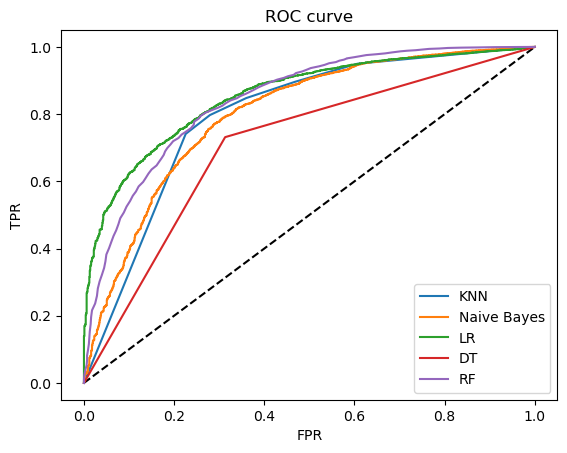

In [190]:
# lets plot them roc curve for all models
plt.plot([0,1],[0,1],'k--')
plt.plot(fprk,tprk,label='KNN')
plt.plot(fprgb,tprgb,label='Naive Bayes')
plt.plot(fprglr,tprlr,label='LR')
plt.plot(fprdtr,tprdtr,label='DT')
plt.plot(fprrf,tprrf,label='RF')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)
plt.show()

Logistic Regression nears the True Positive Rates in roc curve

In [192]:
# lets check prediction of LR
lr.predict([[-1.112357,0.610467,0.635211,1.040790,-0.835557,-0.543033,-1.265915,-0.397598,-0.543280,-0.430953,-0.478009,-0.862811,-0.184556,1.041463]])

array([1])

In [193]:
if lr.predict([[-1.112357,0.610467,0.635211,1.040790,-0.835557,-0.543033,-1.265915,-0.397598,-0.543280,-0.430953,-0.478009,-0.862811,-0.184556,1.041463]])[0]==0:
    print("Fraud Transcation")
else:
    print("Good Transcation")

Good Transcation


## Hyperparameter for Logistic Regression 

In [195]:
from sklearn.model_selection import GridSearchCV


In [196]:
lr = LogisticRegression()

In [197]:
parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'tol' : [1e-1 , 1e-2 , 1e-3 , 1e-4],
                           'class_weight' : ['balanced',None],'max_iter' : [50,100,130,150,200],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'multi_class' : ['auto', 'ovr', 'multinomial'], 'verbose' : [0,1],
            'n_jobs' : [1,-1]}

In [198]:
from sklearn.model_selection import cross_val_score

In [200]:
gs = GridSearchCV(estimator=lr , 
                 param_grid=parameters,
                 scoring='accuracy',
                 cv = 10 , 
                 n_jobs=-1)

In [ ]:
grid_sv = gs.fit(X_train_1,Y_train_1)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)


In [ ]:
#  my server is  buffering